In [3]:
import function as f
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
folder_path = 'Results'
y_col = ['C_max', 'Congestion_ratio_AVG']

cr_dfs = f.get_dfs_by_folder(folder_path, y_col, True, y_col[0])
cr_dfs = f.to_numeric(cr_dfs, y_col[1])
cr_dfs

Remove outliers by  C_max !


[('prev_5_now_5',
      Prev Truck Number Now Truck Number  alpha_1  alpha_2  alpha_3  repeat_num  \
  0                   5                5        0        0      100           1   
  1                   5                5        0        0      100           2   
  2                   5                5        0        0      100           3   
  3                   5                5        0        0      100           4   
  4                   5                5        0        0      100           5   
  ..                ...              ...      ...      ...      ...         ...   
  510                 5                5       80       10       10          56   
  511                 5                5       80       10       10          57   
  512                 5                5       80       10       10          58   
  513                 5                5       80       10       10          59   
  514                 5                5       80       10       10  

In [3]:
# Dictionary of DataFrames
gap_dict = {}

for file_name, df in cr_dfs:
    print(file_name)
    grouped_df = df.groupby(['alpha_1', 'alpha_2', 'alpha_3'])['Congestion_ratio_AVG'].mean().reset_index()
    shortest_cr = grouped_df.loc[grouped_df['alpha_1'] == 0, 'Congestion_ratio_AVG'].values[0]
    grouped_df['Gap'] = (grouped_df['Congestion_ratio_AVG'] - shortest_cr) / shortest_cr * 100
    gap_dict[file_name] = grouped_df

prev_5_now_5
prev_5_now_10
prev_10_now_10
prev_10_now_15
prev_15_now_15
prev_15_now_20
prev_20_now_20
prev_20_now_25
prev_25_now_25
prev_25_now_30
prev_30_now_30


In [4]:
# Create an empty DataFrame
merged_df = pd.DataFrame()

# Iterate through the dictionary items
for key, df in gap_dict.items():
    # Create a new DataFrame with the key in the first row and the values in the second row
    key_df = pd.DataFrame({'file name': [key]})
    value_df = df.copy().reset_index(drop=True)
    
    # Concatenate the key DataFrame and the value DataFrame
    result_df = pd.concat([key_df, value_df], ignore_index=True)
    
    # Append the result to the merged DataFrame
    merged_df = pd.concat([merged_df, result_df], ignore_index=True)

# Save the merged DataFrame to a single CSV file
merged_df.to_csv('Gap.csv', index=False)

In [6]:
column_order = ['yt_num', 'best_weight', y_col[0] + '_mean', y_col[0]+'_std']
cr_tb = pd.DataFrame(columns= column_order)

for file_name, df in cr_dfs:

    yt_num = int(df['Prev Truck Number'].unique()[0]) + int(df['Now Truck Number'].unique()[0])
    
    df_groupby = df.groupby(['alpha_1', 'alpha_2', 'alpha_3'])[y_col[0]]

    mean_df = df_groupby.mean().reset_index()
    std_df = df_groupby.std().reset_index()
    
    # merge mean and std
    df_groupby = pd.merge(mean_df, std_df, on=['alpha_1', 'alpha_2', 'alpha_3'], suffixes=('_mean', '_std'))

    best_df = df_groupby[df_groupby[column_order[2]] == df_groupby[column_order[2]].min()]
    shortest_df = df_groupby[df_groupby['alpha_1'] == 0]
    
    str_yt_num = str(yt_num) + ' (' + df['Prev Truck Number'].unique()[0] + ', ' + df['Now Truck Number'].unique()[0] + ')'
    str_best_weight = str(best_df['alpha_1'].values[0]) + ', ' + str(best_df['alpha_2'].values[0]) + ', ' + str(best_df['alpha_3'].values[0])
    best_df = best_df.assign(yt_num = str_yt_num, best_weight = str_best_weight)
    best_df = best_df[column_order]
    
    best_df[column_order[2]] = best_df[column_order[2]].values - shortest_df[column_order[2]].values
    best_df[column_order[3]] = best_df[column_order[3]].values - shortest_df[column_order[3]].values
      
    cr_tb = pd.concat([cr_tb, best_df], ignore_index=True)
    
cr_tb

,yt_num,best_weight,C_max_mean,C_max_std
0,"10 (5, 5)","0, 0, 100",0.000000,0.000000
1,"15 (5, 10)","0, 0, 100",0.000000,0.000000
2,"20 (10, 10)","40, 50, 10",-1.601404,-1.355594
3,"25 (10, 15)","60, 30, 10",-1.586831,-0.628609
4,"30 (15, 15)","60, 30, 10",-1.294316,0.395979
5,"35 (15, 20)","50, 40, 10",-2.682793,-3.327396
6,"40 (20, 20)","30, 60, 10",-4.123601,-4.298080
7,"45 (20, 25)","10, 80, 10",-2.720121,-2.279262
8,"50 (25, 25)","70, 20, 10",-7.632716,0.328066
9,"55 (25, 30)","10, 80, 10",-11.248171,-3.013281


In [7]:
folder_path = 'Results'
y_col = ['C_max']

c_max_dfs = f.get_dfs_by_folder(folder_path, y_col, True, y_col[0])
c_max_dfs

Remove outliers by  C_max !


[('prev_5_now_5',
      Prev Truck Number Now Truck Number  alpha_1  alpha_2  alpha_3  repeat_num  \
  0                   5                5        0        0      100           1   
  1                   5                5        0        0      100           2   
  2                   5                5        0        0      100           3   
  3                   5                5        0        0      100           4   
  4                   5                5        0        0      100           5   
  ..                ...              ...      ...      ...      ...         ...   
  510                 5                5       80       10       10          56   
  511                 5                5       80       10       10          57   
  512                 5                5       80       10       10          58   
  513                 5                5       80       10       10          59   
  514                 5                5       80       10       10  

In [8]:
column_order = ['yt_num', 'best_weight', y_col[0] + '_mean', y_col[0]+'_std']
c_max_tb = pd.DataFrame(columns= column_order)

for file_name, df in c_max_dfs:

    yt_num = int(df['Prev Truck Number'].unique()[0]) + int(df['Now Truck Number'].unique()[0])
    
    df_groupby = df.groupby(['alpha_1', 'alpha_2', 'alpha_3'])[y_col[0]]

    mean_df = df_groupby.mean().reset_index()
    std_df = df_groupby.std().reset_index()
    
    # merge mean and std
    df_groupby = pd.merge(mean_df, std_df, on=['alpha_1', 'alpha_2', 'alpha_3'], suffixes=('_mean', '_std'))

    best_df = df_groupby[df_groupby[column_order[2]] == df_groupby[column_order[2]].min()]
    shortest_df = df_groupby[df_groupby['alpha_1'] == 0]
    
    str_yt_num = str(yt_num) + ' (' + df['Prev Truck Number'].unique()[0] + ', ' + df['Now Truck Number'].unique()[0] + ')'
    str_best_weight = str(best_df['alpha_1'].values[0]) + ', ' + str(best_df['alpha_2'].values[0]) + ', ' + str(best_df['alpha_3'].values[0])
    best_df = best_df.assign(yt_num = str_yt_num, best_weight = str_best_weight)
    best_df = best_df[column_order]
    
    best_df[column_order[2]] = (best_df[column_order[2]].values - shortest_df[column_order[2]].values) / shortest_df[column_order[2]].values
    best_df[column_order[3]] = (best_df[column_order[3]].values - shortest_df[column_order[3]].values) / shortest_df[column_order[3]].values
      
    c_max_tb = pd.concat([c_max_tb, best_df], ignore_index=True)
    
c_max_tb

,yt_num,best_weight,C_max_mean,C_max_std
0,"10 (5, 5)","0, 0, 100",0.000000,0.000000
1,"15 (5, 10)","0, 0, 100",0.000000,0.000000
2,"20 (10, 10)","40, 50, 10",-0.003901,-0.120407
3,"25 (10, 15)","60, 30, 10",-0.003849,-0.058123
4,"30 (15, 15)","60, 30, 10",-0.003108,0.045542
5,"35 (15, 20)","50, 40, 10",-0.006319,-0.257497
6,"40 (20, 20)","30, 60, 10",-0.009544,-0.314393
7,"45 (20, 25)","10, 80, 10",-0.006268,-0.170433
8,"50 (25, 25)","70, 20, 10",-0.017130,0.023242
9,"55 (25, 30)","10, 80, 10",-0.024639,-0.195097


In [9]:
folder_path = 'Results'
y_col = ['Congestion_ratio_AVG', 'C_max']

ev_dfs = f.get_dfs_by_folder(folder_path, y_col, True, y_col[1])
ev_dfs = f.to_numeric(ev_dfs, y_col[0])
ev_dfs

Remove outliers by  C_max !


[('prev_5_now_5',
      Prev Truck Number Now Truck Number  alpha_1  alpha_2  alpha_3  repeat_num  \
  0                   5                5        0        0      100           1   
  1                   5                5        0        0      100           2   
  2                   5                5        0        0      100           3   
  3                   5                5        0        0      100           4   
  4                   5                5        0        0      100           5   
  ..                ...              ...      ...      ...      ...         ...   
  510                 5                5       80       10       10          56   
  511                 5                5       80       10       10          57   
  512                 5                5       80       10       10          58   
  513                 5                5       80       10       10          59   
  514                 5                5       80       10       10  

In [10]:
column_order = ['yt_num', 'best_weight', 'Congestion_ratio_AVG', 'C_max']
ev_tb = pd.DataFrame(columns= column_order)

for file_name, df in ev_dfs:
    
    yt_num = int(df['Prev Truck Number'].unique()[0]) + int(df['Now Truck Number'].unique()[0])
    
    df_groupby = df.groupby(['alpha_1', 'alpha_2', 'alpha_3'])[['Congestion_ratio_AVG', 'C_max']]

    mean_df = df_groupby.mean().reset_index()
    std_df = df_groupby.std().reset_index()
    
    # merge mean and std
    df_groupby = pd.merge(mean_df, std_df, on=['alpha_1', 'alpha_2', 'alpha_3'], suffixes=('_mean', '_std'))

#     best_df = df_groupby[df_groupby['Congestion_ratio_AVG_mean'] == df_groupby['Congestion_ratio_AVG_mean'].min()]
#     shortest_df = df_groupby[df_groupby['alpha_1'] == 0]
    
#     str_yt_num = str(yt_num) + ' (' + df['Prev Truck Number'].unique()[0] + ', ' + df['Now Truck Number'].unique()[0] + ')'
#     str_best_weight = str(best_df['alpha_1'].values[0]) + ', ' + str(best_df['alpha_2'].values[0]) + ', ' + str(best_df['alpha_3'].values[0])
#     best_df = best_df.assign(yt_num = str_yt_num, best_weight = str_best_weight)
#     best_df = best_df[column_order]
    
#     best_df['Congestion_ratio_AVG_mean'] = best_df['Congestion_ratio_AVG_mean'].values - shortest_df['Congestion_ratio_AVG_mean'].values
#     best_df['Congestion_ratio_AVG_std'] = best_df['Congestion_ratio_AVG_std'].values - shortest_df['Congestion_ratio_AVG_std'].values
      
#     ev_tb = pd.concat([ev_tb, best_df], ignore_index=True)
    
# ev_tb

In [10]:
def line_subplot(_df, _x_col, _y_col, _title, _figsize, _y_lim, _legend_loc):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize = _figsize)
        
    _shortest_df = _df[_df['alpha_1'] == 0]
    _others_df = _df[_df['alpha_1'] != 0]

    # Plot for _shortest_df
    axes[0].set_title(_title + ' of Shortest', fontsize= 12)
    axes[1].set_title(_title + ' of LP', fontsize= 12)

    for y_col_i in _y_col:
        _shortest_df.groupby(_x_col)[y_col_i].mean().plot(ax=axes[0], label= 'Mean of ' + y_col_i)
        _others_df.groupby(_x_col)[y_col_i].mean().plot(ax=axes[1], label= 'Mean of ' + y_col_i)
        
        mean_shortest = _shortest_df.groupby(_x_col)[y_col_i].mean()
        min_shortest = _shortest_df.groupby(_x_col)[y_col_i].min()
        max_shortest = _shortest_df.groupby(_x_col)[y_col_i].max()

        mean_others = _others_df.groupby(_x_col)[y_col_i].mean()
        min_others = _others_df.groupby(_x_col)[y_col_i].min()
        max_others = _others_df.groupby(_x_col)[y_col_i].max()

        axes[0].fill_between(mean_shortest.index, min_shortest, max_shortest, alpha=0.2)
        axes[1].fill_between(mean_others.index, min_others, max_others, alpha=0.2)

    # Set common y-axis limits
    for ax in axes:
        ax.set_ylim(_y_lim)
        # ax.set_xlabel(_x_col)
        ax.set_ylabel('Completion Time')
        ax.legend(loc = _legend_loc, fontsize = 9)    

    plt.suptitle(_title)
    plt.show()

In [8]:
folder_path = 'Results'
_y_col = ['Congestion_ratio', 'TravelTime_by_Distance']

travel_dfs = f.get_dfs_by_folder(folder_path, _y_col, True, _y_col[0])

concat_df_10_80_10 = pd.DataFrame()

for file_name, df in travel_dfs:
    shortest_df = df[(df['alpha_1'] == 0) & (df['alpha_2'] == 0) & (df['alpha_3'] == 100)]
    df_10_80_10 = df[(df['alpha_1'] == 10) & (df['alpha_2'] == 80) & (df['alpha_3'] == 10)]
    
    # concat shortest_df and others_df and concat_df
    concat_df_10_80_10 = pd.concat([concat_df_10_80_10, shortest_df, df_10_80_10], ignore_index=True)

# Add Column Number of YT
concat_df_10_80_10['Number of YT'] = concat_df_10_80_10['Prev Truck Number'].astype(int) + concat_df_10_80_10['Now Truck Number'].astype(int)
concat_df_10_80_10['TravelTime_by_Distance'] = concat_df_10_80_10['TravelTime_by_Distance'].astype(float)

Remove outliers by  Congestion_ratio !


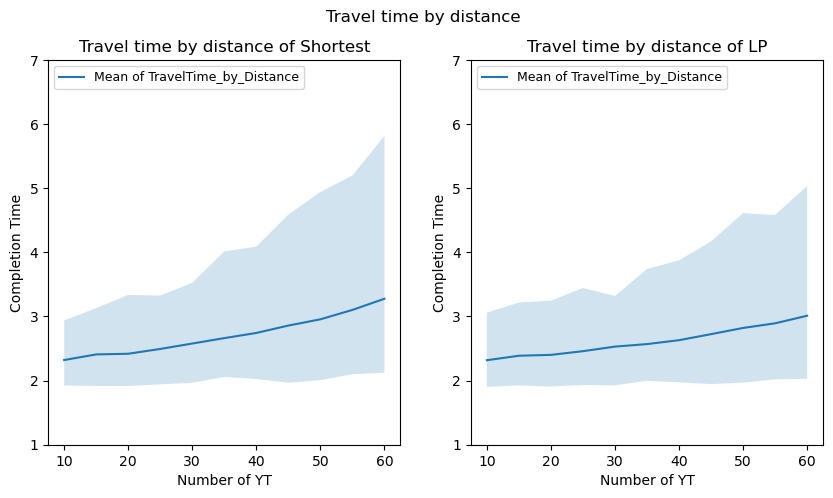

In [11]:
x_col = 'Number of YT'
y_col = ['TravelTime_by_Distance']
title = 'Travel time by distance'
figsize = (10, 5)
y_lim = (1, 7)

line_subplot(concat_df_10_80_10, x_col, y_col, title, figsize, y_lim, 'upper left')

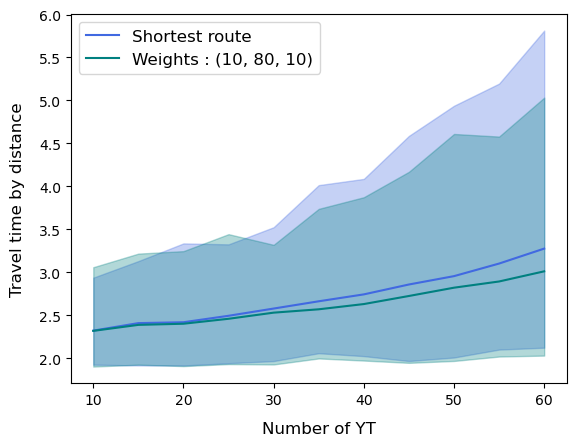

In [124]:
# line plot
_x_col = 'Number of YT'
_y_col = ['TravelTime_by_Distance']

_shortest_df = concat_df_10_80_10[concat_df_10_80_10['alpha_1'] == 0]
_others_df = concat_df_10_80_10[concat_df_10_80_10['alpha_1'] != 0]

# Define colors for each curve
shortest_color = 'royalblue'
others_color = 'teal'

figsize = (10, 5)
for y_col_i in _y_col:
    _shortest_df.groupby(_x_col)[y_col_i].mean().plot(label= 'Shortest route', color = shortest_color)
    _others_df.groupby(_x_col)[y_col_i].mean().plot(label= 'Weights : (10, 80, 10)', color = others_color)
    
    mean_shortest = _shortest_df.groupby(_x_col)[y_col_i].mean()
    min_shortest = _shortest_df.groupby(_x_col)[y_col_i].min()
    max_shortest = _shortest_df.groupby(_x_col)[y_col_i].max()

    mean_others = _others_df.groupby(_x_col)[y_col_i].mean()
    min_others = _others_df.groupby(_x_col)[y_col_i].min()
    max_others = _others_df.groupby(_x_col)[y_col_i].max()
    
    plt.fill_between(mean_shortest.index, min_shortest, max_shortest, alpha=0.3, color = shortest_color)
    plt.fill_between(mean_others.index, min_others, max_others, alpha=0.3, color = others_color)
    # plt.fill_between(mean_shortest.index, min_shortest, max_shortest, color = shortest_color)
    # plt.fill_between(mean_others.index, min_others, max_others, color = others_color)

plt.legend(loc = 'upper left', fontsize = 12)
# set y-axis label
plt.ylabel('Travel time by distance', fontsize = 12, labelpad=10)
# set size of x-axis label
plt.xlabel('Number of YT', fontsize = 12, labelpad=10)
plt.show()

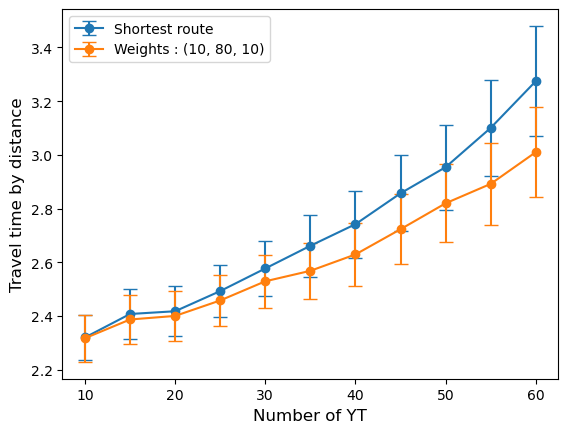

In [129]:
_x_col = 'Number of YT'
_y_col = 'TravelTime_by_Distance'

_shortest_df = concat_df_10_80_10[concat_df_10_80_10['alpha_1'] == 0]
_others_df = concat_df_10_80_10[concat_df_10_80_10['alpha_1'] != 0]

# Calculate mean and relative standard deviation for both cases
mean_shortest = _shortest_df.groupby(_x_col)[_y_col].mean()
std_shortest = _shortest_df.groupby(_x_col)[_y_col].std() / mean_shortest

mean_others = _others_df.groupby(_x_col)[_y_col].mean()
std_others = _others_df.groupby(_x_col)[_y_col].std() / mean_others

# Plot mean values with error bars representing relative standard deviation
plt.errorbar(mean_shortest.index, mean_shortest, yerr=std_shortest, label='Shortest route', capsize=5, marker='o')
plt.errorbar(mean_others.index, mean_others, yerr=std_others, label='Weights : (10, 80, 10)', capsize=5, marker='o')

# Add labels and legend
plt.xlabel('Number of YT', fontsize=12)
plt.ylabel('Travel time by distance', fontsize=12)
plt.legend()

# Show the plot
plt.show()

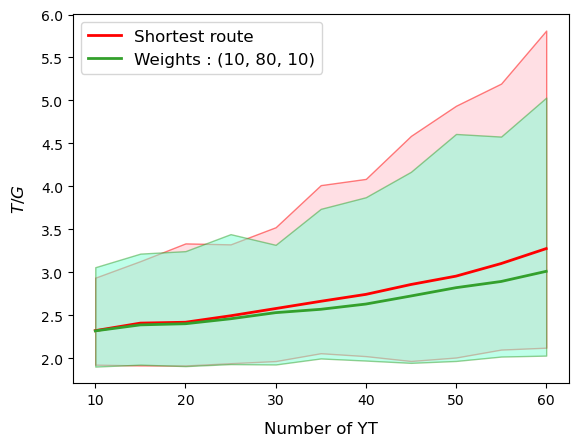

In [162]:
import matplotlib.pyplot as plt
import numpy as np

# line plot
_x_col = 'Number of YT'
_y_col = ['TravelTime_by_Distance']

_shortest_df = concat_df_10_80_10[concat_df_10_80_10['alpha_1'] == 0]
_others_df = concat_df_10_80_10[concat_df_10_80_10['alpha_1'] != 0]

# Define colors for each curve
shortest_line_color = '#FF0000'  # Darker blue for the line edge
shortest_fill_color = '#FFC0CB'  # Lighter blue for the fill

others_line_color = '#33a02c'    # Darker green for the line edge
others_fill_color = '#7FFFD4'    # Lighter green for the fill

figsize = (10, 5)
for y_col_i in _y_col:
    # Plot the line with a darker color for the edge
    _shortest_df.groupby(_x_col)[y_col_i].mean().plot(label='Shortest route', color=shortest_line_color, linewidth=2)
    _others_df.groupby(_x_col)[y_col_i].mean().plot(label='Weights : (10, 80, 10)', color=others_line_color, linewidth=2)
    
    mean_shortest = _shortest_df.groupby(_x_col)[y_col_i].mean()
    min_shortest = _shortest_df.groupby(_x_col)[y_col_i].min()
    max_shortest = _shortest_df.groupby(_x_col)[y_col_i].max()

    mean_others = _others_df.groupby(_x_col)[y_col_i].mean()
    min_others = _others_df.groupby(_x_col)[y_col_i].min()
    max_others = _others_df.groupby(_x_col)[y_col_i].max()
    
    # Fill the area with a lighter color and higher transparency
    plt.fill_between(mean_shortest.index, min_shortest, max_shortest, alpha=0.5, color=shortest_fill_color, edgecolor=shortest_line_color)
    plt.fill_between(mean_others.index, min_others, max_others, alpha=0.5, color=others_fill_color, edgecolor=others_line_color)

plt.legend(loc='upper left', fontsize=12)
# set y-axis label
plt.ylabel('$T/G$', fontsize=12, labelpad=10)
# set size of x-axis label
plt.xlabel('Number of AYT', fontsize=12, labelpad=10)
plt.show()


In [17]:
# # travel_dfs = {}
# # Initialize an empty DataFrame to store the results
# congestion_ratio_avg_merged_df = pd.DataFrame()

# for df_name, df in travel_dfs:
    
#     Number_of_YT = int(df['Prev Truck Number'].unique()[0]) + int(df['Now Truck Number'].unique()[0])
#     grouped_df = df.groupby(['alpha_1', 'alpha_2', 'alpha_3'])['Congestion_ratio_AVG'].mean().reset_index()
#     grouped_df['Number_of_YTs'] = Number_of_YT
#     congestion_ratio_avg_new_dfs[df_name] = grouped_df
    
#     congestion_ratio_avg_merged_df = pd.concat([congestion_ratio_avg_merged_df, grouped_df], ignore_index=True)

# print(congestion_ratio_avg_merged_df)
    

In [18]:
congestion_ratio_avg_merged_df.sort_values(by=['Number_of_YTs', 'Congestion_ratio_AVG']).groupby('Number_of_YTs').head(3)['alpha_1'].value_counts()

NameError: name 'congestion_ratio_avg_merged_df' is not defined

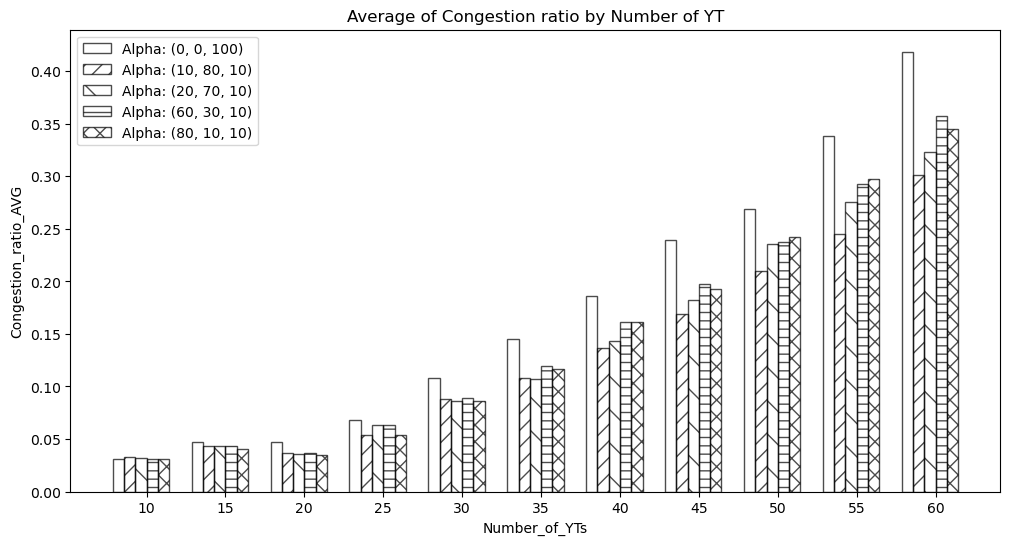

In [ ]:
x_col_name = 'Number_of_YTs'
y_col_name = 'Congestion_ratio_AVG'
title = 'Average of Congestion ratio by Number of YT'

alpha_1_list = [0, 10, 20, 60, 80]

# Filter the DataFrame based on 'alpha_1_list'
filtered_df = congestion_ratio_avg_merged_df[congestion_ratio_avg_merged_df['alpha_1'].isin(alpha_1_list)]

f.bar_plot_hatch(filtered_df, x_col_name, y_col_name, title)

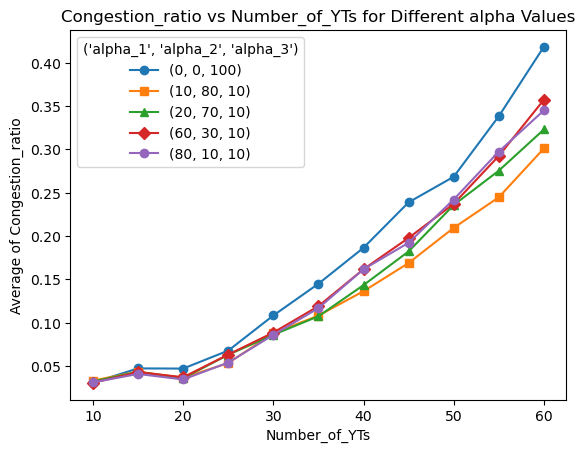

In [ ]:
from itertools import cycle

# Group by 'alpha_1', 'alpha_2', 'alpha_3'
grouped_by_alpha = filtered_df.groupby(['alpha_1', 'alpha_2', 'alpha_3'])

# Define a list of markers
markers = ['o', 's', '^', 'D']

# Use cycle to create a cycling iterator for markers
marker_cycle = cycle(markers)

# Plot each group with a different marker
for name, group in grouped_by_alpha:
    marker = next(marker_cycle)
    plt.plot(group['Number_of_YTs'], group['Congestion_ratio_AVG'], label=name, marker=marker)

# Set labels and title
plt.xlabel('Number_of_YTs')
plt.ylabel('Average of Congestion_ratio')
plt.title('Congestion_ratio vs Number_of_YTs for Different alpha Values')
plt.legend(title=('alpha_1', 'alpha_2', 'alpha_3'))
# plt.ylim(0, 1)

# Show the plot
plt.show()

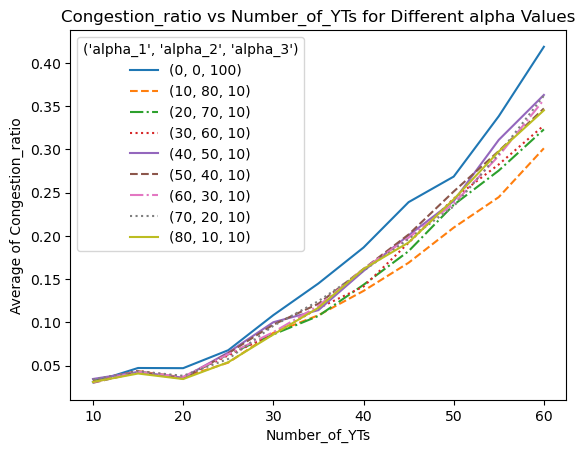

In [ ]:
# Group by 'alpha_1', 'alpha_2', 'alpha_3'
grouped_by_alpha = congestion_ratio_avg_merged_df.groupby(['alpha_1', 'alpha_2', 'alpha_3'])

# Define a dictionary to map line styles to each group
line_styles = {
    (0, 0, 100): '-',
    (10, 80, 10): '--',
    (20, 70, 10): '-.',
    (30, 60, 10): ':',
    (40, 50, 10): '-',
    (50, 40, 10): '--',
    (60, 30, 10): '-.',
    (70, 20, 10): ':',
    (80, 10, 10): '-',
}

# Plot each group with the corresponding line style
for name, group in grouped_by_alpha:
    linestyle = line_styles.get(name, '-')  # Use a solid line if no specific style is defined
    plt.plot(group['Number_of_YTs'], group['Congestion_ratio_AVG'], label=name, linestyle=linestyle)

# Set labels and title
plt.xlabel('Number_of_YTs')
plt.ylabel('Average of Congestion_ratio')
plt.title('Congestion_ratio vs Number_of_YTs for Different alpha Values')
plt.legend(title=('alpha_1', 'alpha_2', 'alpha_3'))
# plt.ylim(0,1)
# Show the plot
plt.show()

### 40, 60대 일때 Completion time

In [144]:
folder_path = 'results'
_y_col = ['Congestion_ratio', 'Truck_id', 'Completion_Time_alone', 'Completion_Time']

completion_dfs = f.get_dfs_by_folder(folder_path, _y_col, True, _y_col[0])

# Initialize an empty DataFrame to store the results
concat_df = pd.DataFrame()

for df_name, df in completion_dfs:
    shortest_df = df[(df['alpha_1'] == 0) & (df['alpha_2'] == 0) & (df['alpha_3'] == 100)]
    others_df = df[(df['alpha_1'] == 10) & (df['alpha_2'] == 80) & (df['alpha_3'] == 10)]
    
    # Merge DataFrames based on common columns
    merged_df = pd.merge(others_df, shortest_df[['repeat_num', 'Truck_id', 'Completion_Time_alone', 'Completion_Time']],
                         on=['repeat_num', 'Truck_id'],
                         suffixes=('_LP', '_shortest'))
    # # Drop duplicates based on all columns
    # merged_df = merged_df.drop_duplicates()
    
    # Drop Completion_Time_alone_LP column
    merged_df = merged_df.drop(columns=['Completion_Time_alone_LP'])
    
    concat_df = pd.concat([concat_df, merged_df], ignore_index=True)

print(concat_df)

Remove outliers by  Congestion_ratio !
      Prev Truck Number Now Truck Number  alpha_1  alpha_2  alpha_3  \
0                     5                5       10       80       10   
1                     5                5       10       80       10   
2                     5                5       10       80       10   
3                     5                5       10       80       10   
4                     5                5       10       80       10   
...                 ...              ...      ...      ...      ...   
22924                30               30       10       80       10   
22925                30               30       10       80       10   
22926                30               30       10       80       10   
22927                30               30       10       80       10   
22928                30               30       10       80       10   

       repeat_num  Congestion_ratio   Truck_id Completion_Time_LP  \
0               1          0.000186    

In [145]:
# set string to float
concat_df['Completion_Time_alone_shortest'] = concat_df['Completion_Time_alone_shortest'].astype(float)
concat_df['Completion_Time_shortest'] = concat_df['Completion_Time_shortest'].astype(float)
concat_df['Completion_Time_LP'] = concat_df['Completion_Time_LP'].astype(float)

In [176]:
concat_df = concat_df[(concat_df['Completion_Time_alone_shortest'] <= concat_df['Completion_Time_shortest']) & (concat_df['Completion_Time_alone_shortest'] <= concat_df['Completion_Time_LP'])]

In [177]:
concat_df[concat_df['Completion_Time_alone_shortest'] >= concat_df['Completion_Time_shortest']]

,Prev Truck Number,Now Truck Number,alpha_1,alpha_2,alpha_3,repeat_num,Congestion_ratio,Truck_id,Completion_Time_LP,Completion_Time_alone_shortest,Completion_Time_shortest


In [178]:
concat_df[concat_df['Completion_Time_alone_shortest'] >= concat_df['Completion_Time_LP']]

,Prev Truck Number,Now Truck Number,alpha_1,alpha_2,alpha_3,repeat_num,Congestion_ratio,Truck_id,Completion_Time_LP,Completion_Time_alone_shortest,Completion_Time_shortest


In [179]:
yt_40_df = concat_df[(concat_df['Prev Truck Number'] == '20') & (concat_df['Now Truck Number'] == '20')]
yt_60_df = concat_df[(concat_df['Prev Truck Number'] == '30') & (concat_df['Now Truck Number'] == '30')]

random_yt_num = 100

yt_40_df = yt_40_df.sample(n=random_yt_num, random_state=1).reset_index()
yt_60_df = yt_60_df.sample(n=random_yt_num, random_state=1).reset_index()

In [180]:
def completion_time_plot(_df, _x_label, _y_label, _figsize, _ylim, _random_yt_num, _legend_loc, _title):
    plt.figure(figsize=_figsize)

    _linewidth = 1
    # Plot Completion_Time_alone against the index
    plt.plot(_df.index, _df['Completion_Time_LP'], label='MPNM', linestyle='-.', color = 'blue', linewidth=_linewidth)
    plt.plot(_df.index, _df['Completion_Time_shortest'], label='shortest path w/ congestion', linestyle='--', color = 'red', linewidth=_linewidth)
    plt.plot(_df.index, _df['Completion_Time_alone_shortest'], label='shortest path w/o congestion', linestyle='-', color = 'black', linewidth=_linewidth)

    
    # Set labels and title
    # plt.xlabel(_x_label, fontsize = 12, labelpad=10)
    # plt.ylabel(_y_label, fontsize = 12, labelpad=10)
    plt.xlabel(_x_label, fontsize = 14, labelpad=10)
    plt.ylabel(_y_label, fontsize = 14, labelpad=10)
    # # Remove x-axis labels
    # plt.xticks([])
    if _title != '':
        plt.title(_title, fontsize = 15)

    plt.xlim((0, _random_yt_num - 1))
    # # # Set the lower limit for the x-axis
    # plt.xlim(xmin=0, xmax =_x_max)
    plt.ylim(_ylim)
    # Show the legend
    # plt.legend(fontsize = 10, loc = _legend_loc)
    plt.legend(fontsize = 13, loc = _legend_loc)
    

    plt.show()

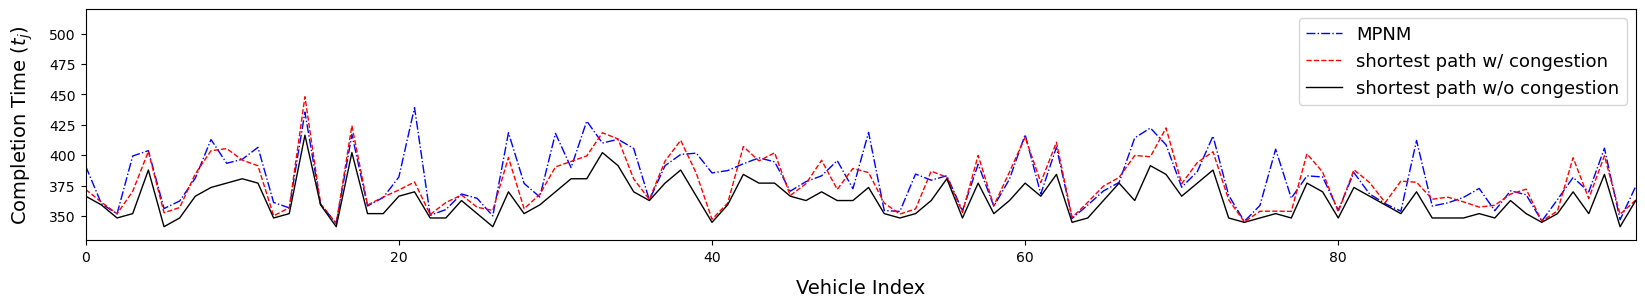

In [181]:
figsize = (20, 3)
ylim = (330, 520)
completion_time_plot(yt_40_df, 'Vehicle Index', 'Completion Time ($t_j$)', figsize, ylim, random_yt_num, 'upper right','')

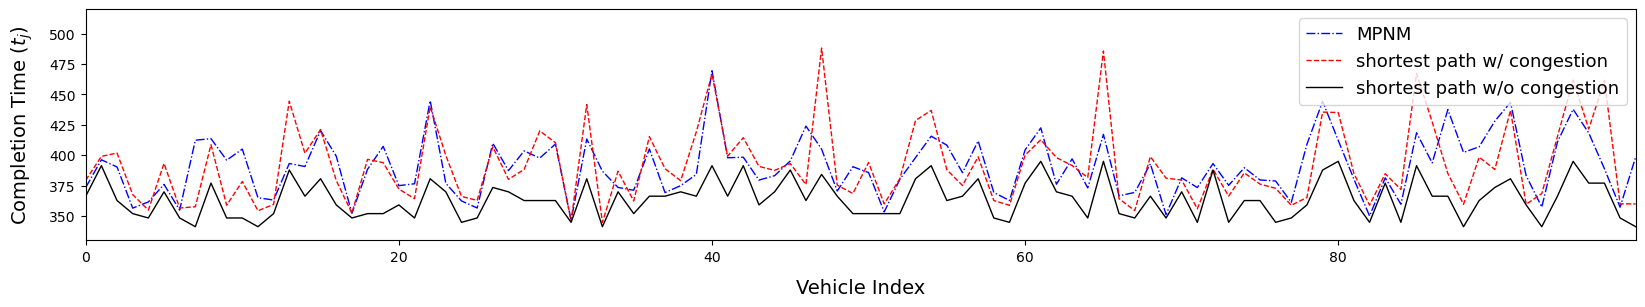

In [182]:
figsize = (20, 3)
ylim = (330, 520)
completion_time_plot(yt_60_df, 'Vehicle Index', 'Completion Time ($t_j$)', figsize, ylim, random_yt_num, 'upper right','')

### 10, 30, 50대 일때 Completion time

In [ ]:
yt_10_df = concat_df[(concat_df['Prev Truck Number'] == '5') & (concat_df['Now Truck Number'] == '5')]
yt_30_df = concat_df[(concat_df['Prev Truck Number'] == '15') & (concat_df['Now Truck Number'] == '15')]
yt_50_df = concat_df[(concat_df['Prev Truck Number'] == '25') & (concat_df['Now Truck Number'] == '25')]

random_num = 100

yt_10_random_df = yt_10_df.sample(n=random_num, random_state = 1).reset_index()
yt_30_random_df = yt_30_df.sample(n=random_num, random_state = 1).reset_index()
yt_50_random_df = yt_50_df.sample(n=random_num, random_state = 1).reset_index()

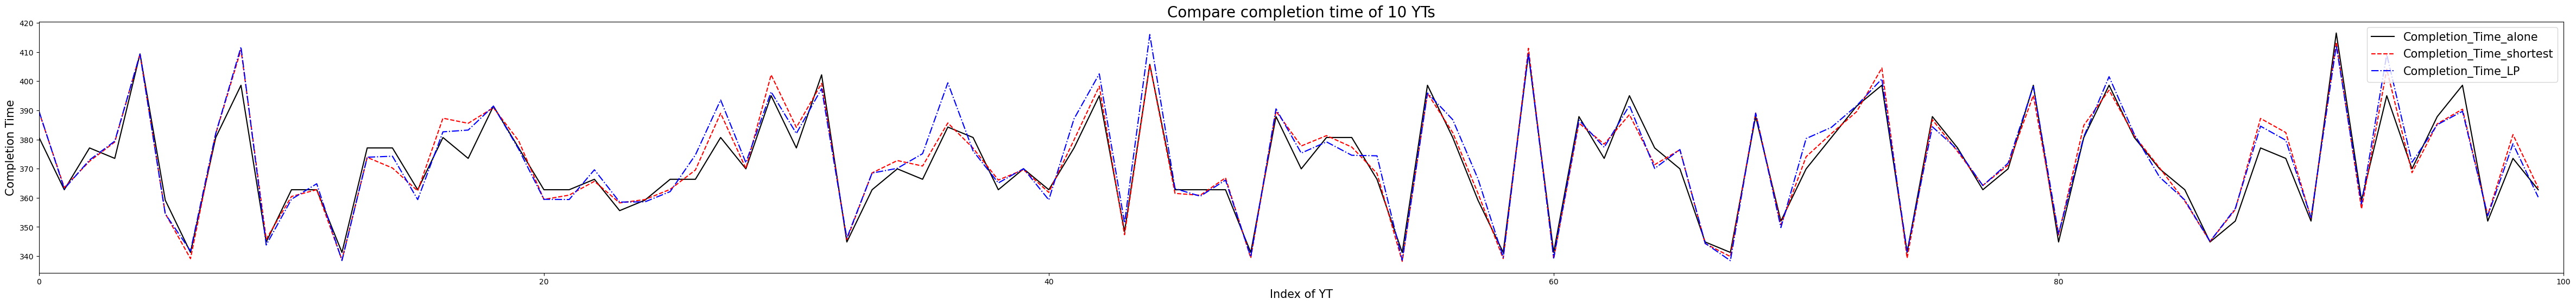

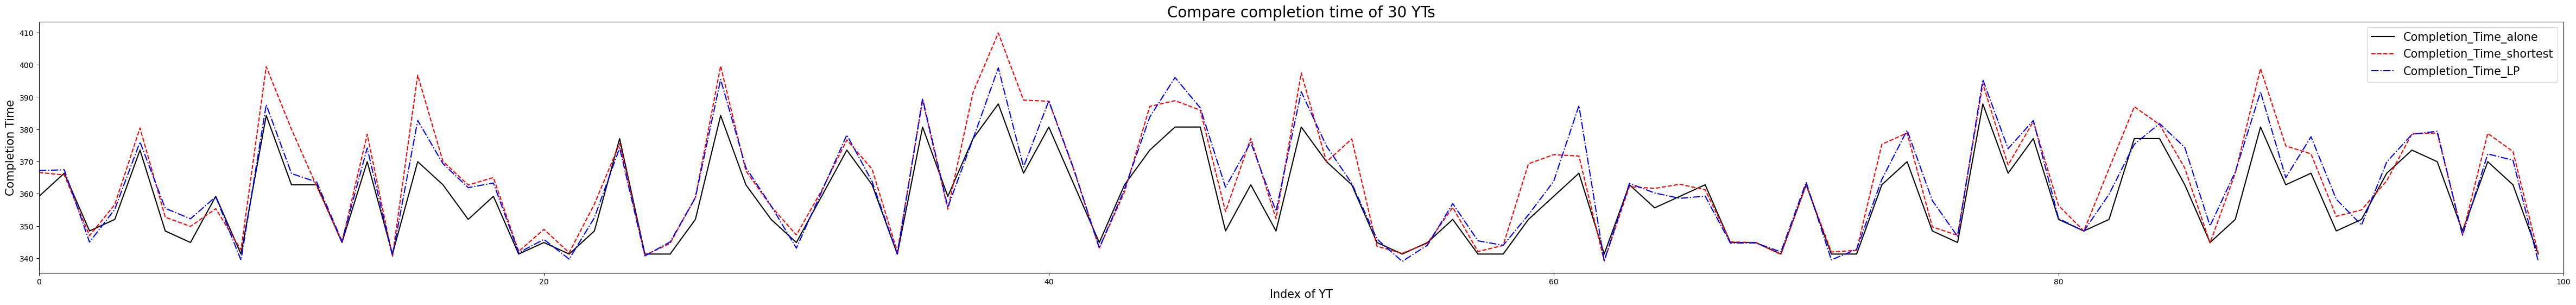

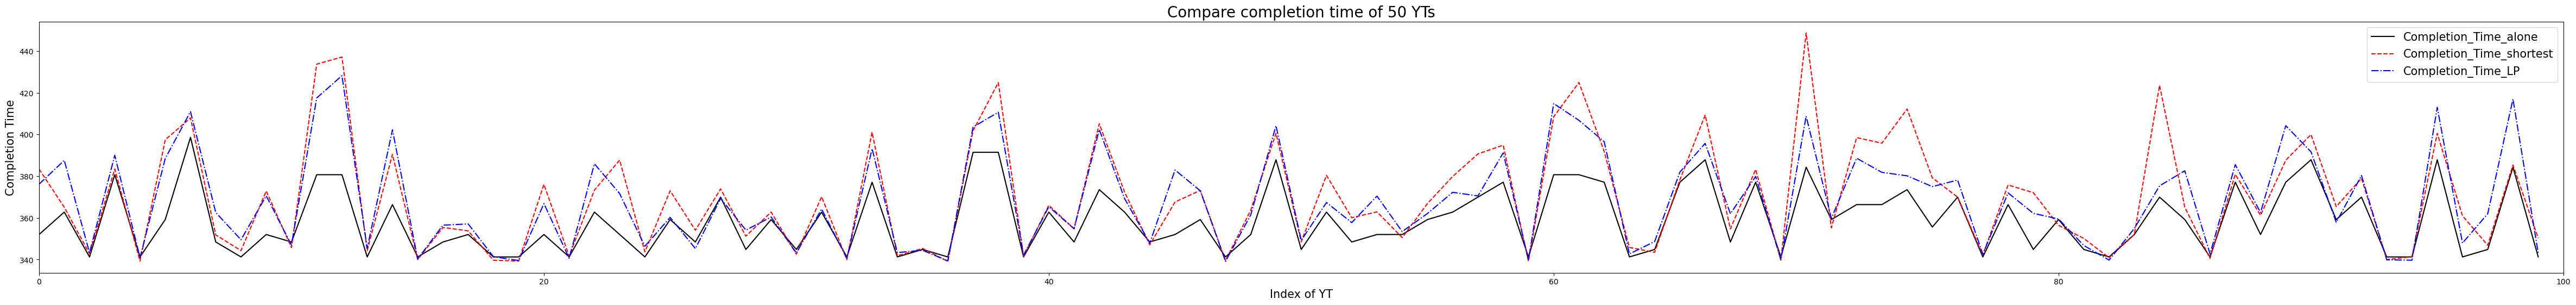

In [ ]:
x_label = 'Index of YT'
y_label = 'Completion Time'
title = 'Compare completion time'

completion_time_plot(yt_10_random_df, x_label, y_label, title + ' of 10 YTs', random_num)
completion_time_plot(yt_30_random_df, x_label, y_label, title + ' of 30 YTs', random_num)
completion_time_plot(yt_50_random_df, x_label, y_label, title + ' of 50 YTs', random_num)

In [ ]:
_y_col = ['Congestion_ratio','Completion_Time']
c_dfs = f.get_dfs_by_folder(folder_path, _y_col, True, _y_col[0])
c_dfs

Remove outliers by  Congestion_ratio !


[('prev_5_now_5',
       Prev Truck Number Now Truck Number  alpha_1  alpha_2  alpha_3  \
  0                    5                5        0        0      100   
  1                    5                5        0        0      100   
  2                    5                5        0        0      100   
  3                    5                5        0        0      100   
  4                    5                5        0        0      100   
  ...                ...              ...      ...      ...      ...   
  6376                 5                5       80       10       10   
  6377                 5                5       80       10       10   
  6378                 5                5       80       10       10   
  6379                 5                5       80       10       10   
  6380                 5                5       80       10       10   
  
        repeat_num  Congestion_ratio Completion_Time  
  0              1         -0.030833         339.992  
  1  

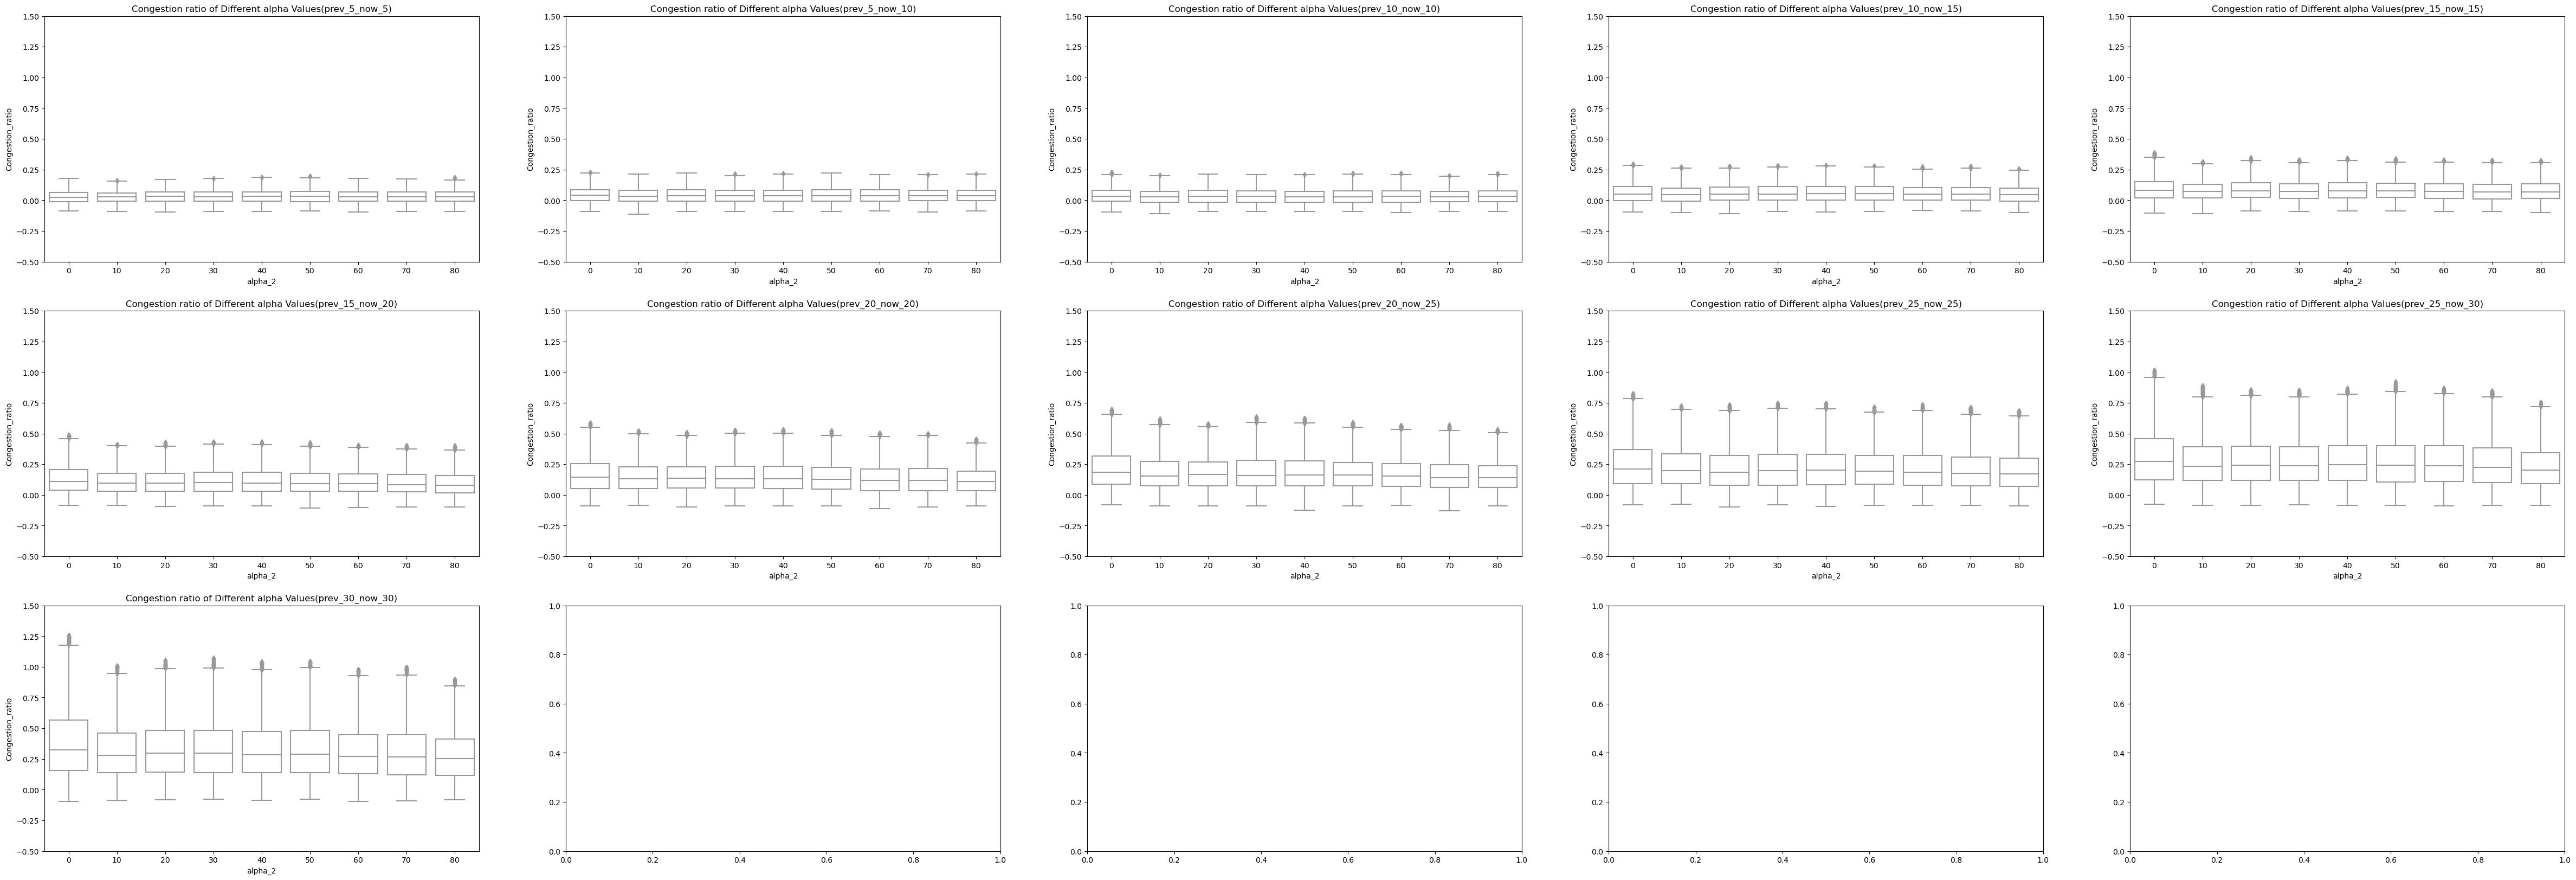

In [ ]:
new_completion_dfs = f.to_numeric(c_dfs, 'Congestion_ratio')
title = 'Congestion ratio of Different alpha Values'
fig_size = (60, 20)
y_lim = (-0.5, 1.5)
col_num = 5 

f.boxsubplot(new_completion_dfs, 'alpha_2', 'Congestion_ratio', col_num, y_lim, title, fig_size)

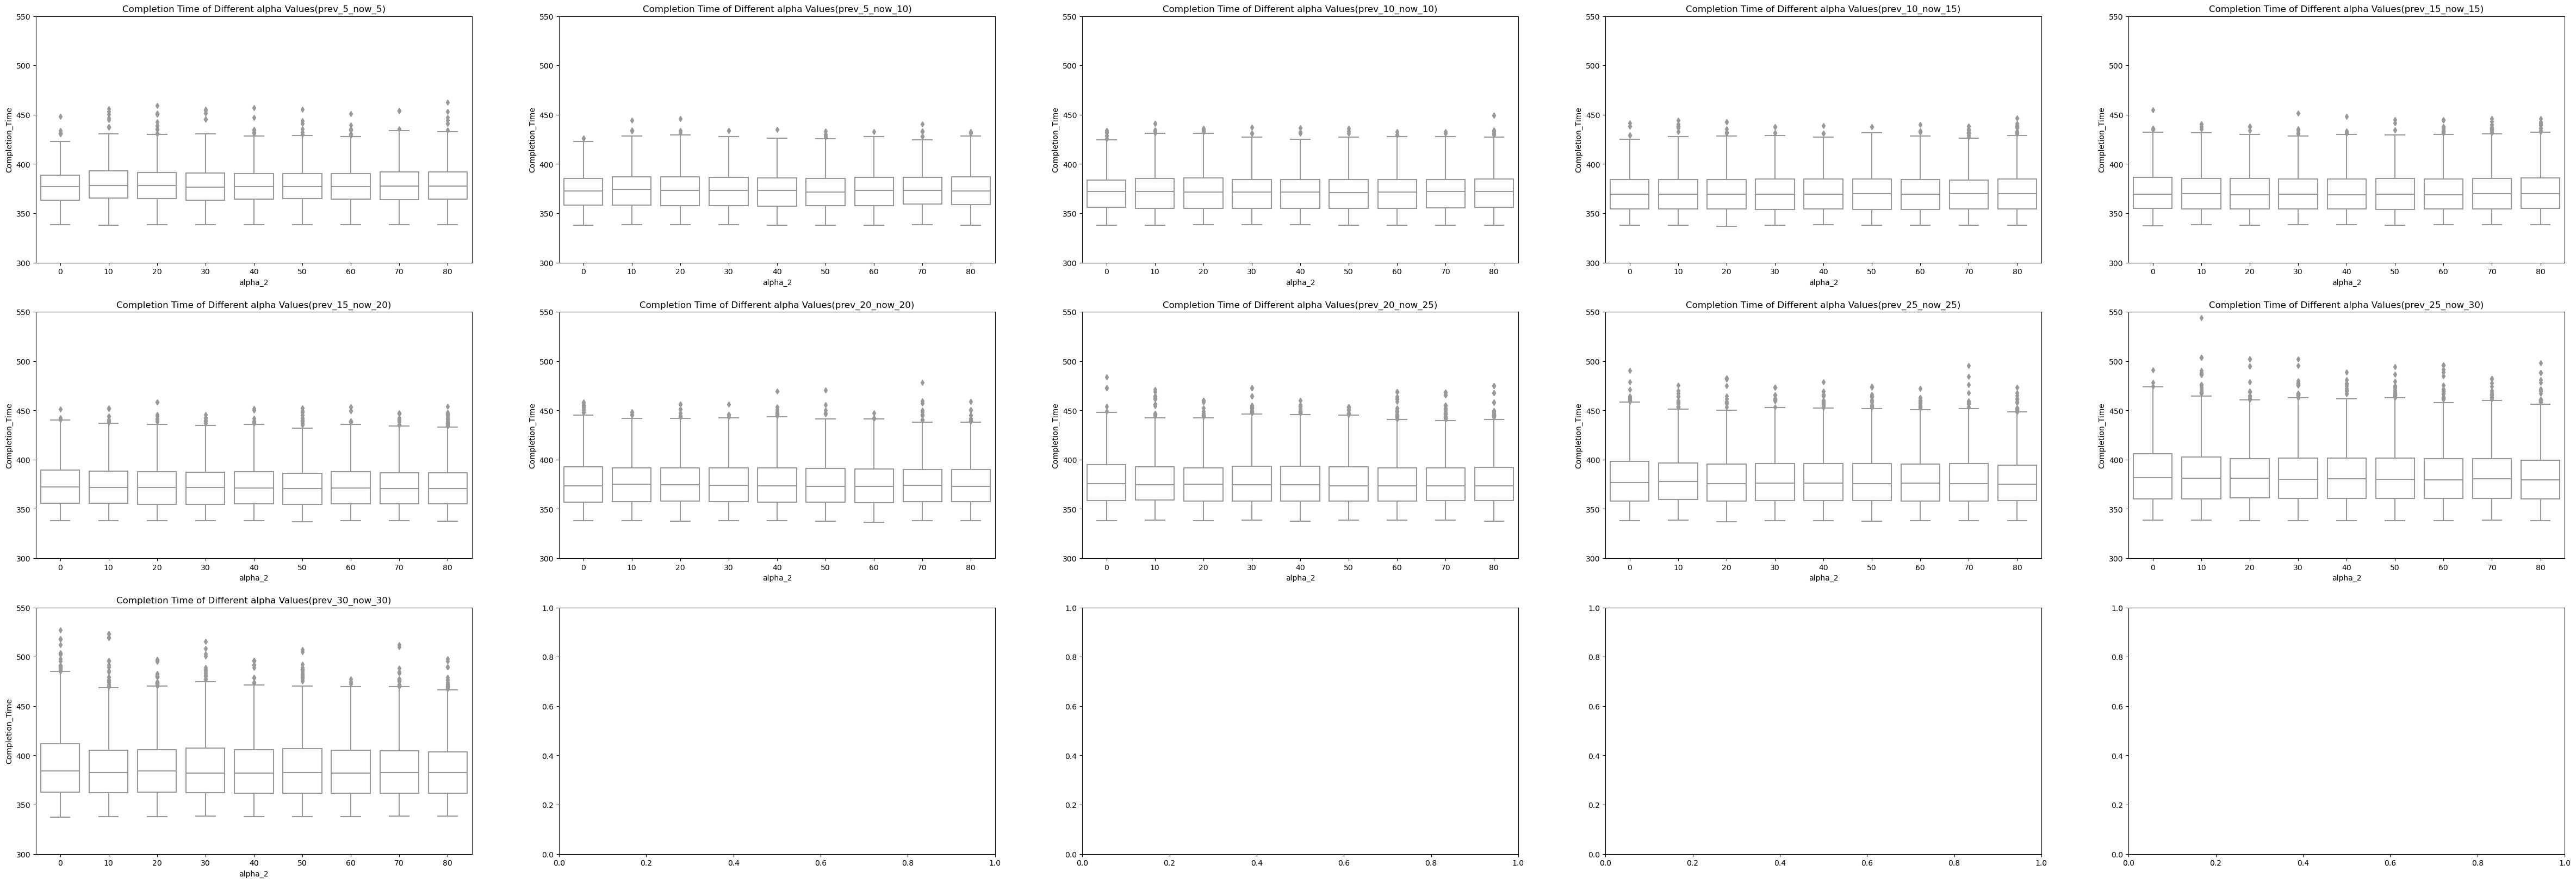

In [ ]:
new_completion_dfs = f.to_numeric(c_dfs, 'Completion_Time')
title = 'Completion Time of Different alpha Values'
fig_size = (60, 20)
y_lim = (300, 550)
col_num = 5 

f.boxsubplot(new_completion_dfs, 'alpha_2', 'Completion_Time', col_num, y_lim, title, fig_size)

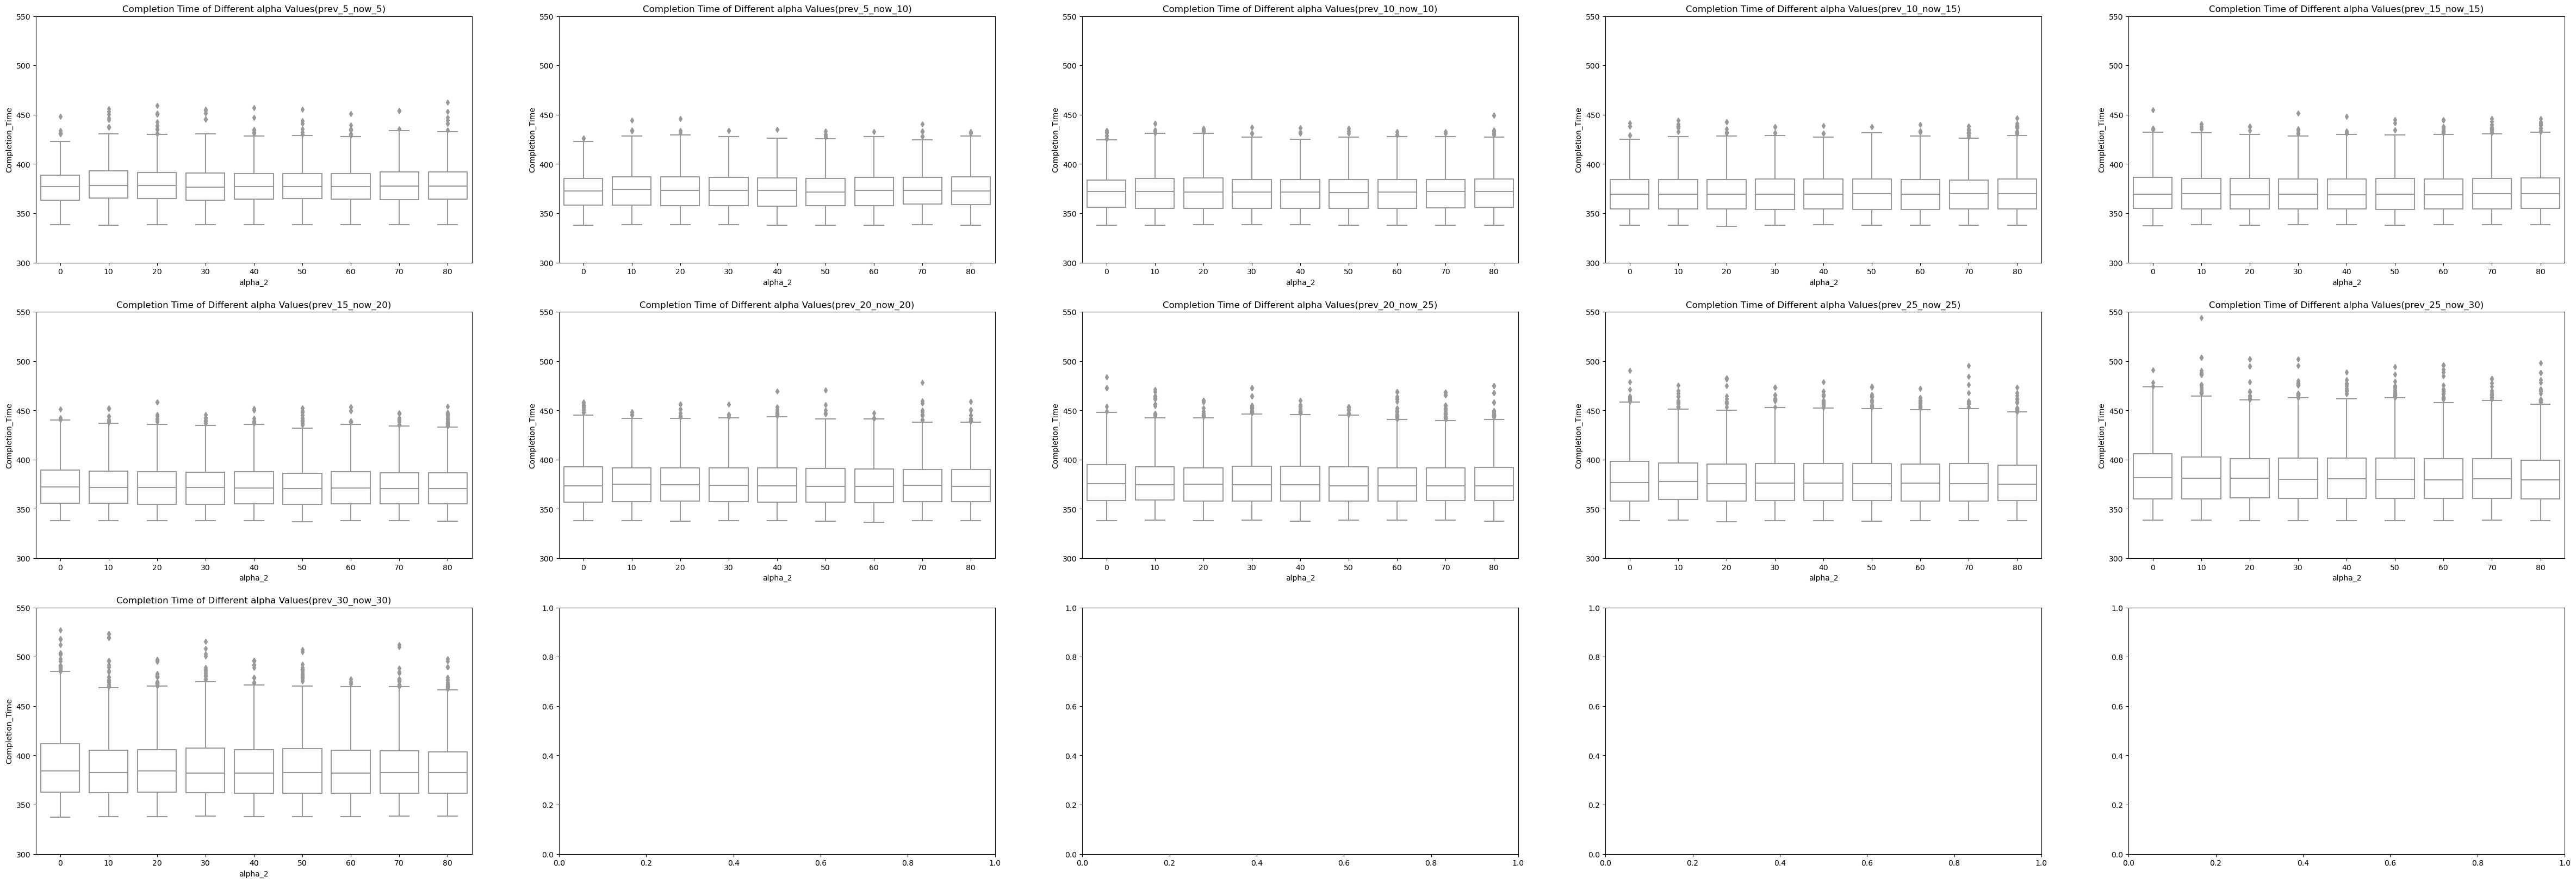

In [ ]:
new_completion_dfs = f.to_numeric(completion_dfs, 'Completion_Time')
title = 'Completion Time of Different alpha Values'
fig_size = (60, 20)
y_lim = (300, 550)
col_num = 5 

f.boxsubplot(new_completion_dfs, 'alpha_2', 'Completion_Time', col_num, y_lim, title, fig_size)

min :  -0.02141301 max :  0.08137266
min :  -0.00988983 max :  0.102573
min :  0.008598832 max :  0.1048616
min :  0.01331389 max :  0.12797
min :  0.03474983 max :  0.1949623
min :  0.06808501 max :  0.2458637
min :  0.1046267 max :  0.3288693
min :  0.1287529 max :  0.4139599
min :  0.1806052 max :  0.3829392
min :  0.2286355 max :  0.4311388
min :  0.2462635 max :  0.5731369


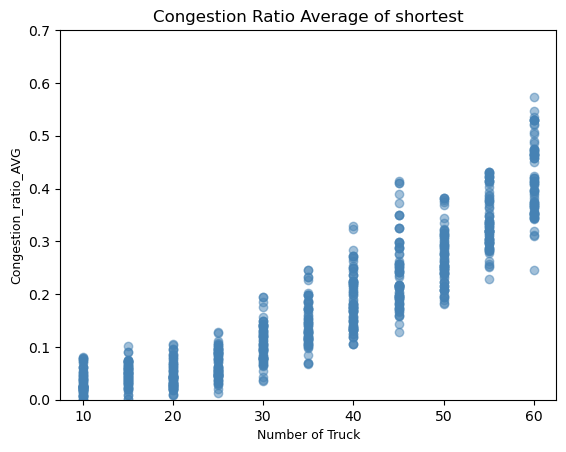

In [ ]:
x_col = ['Prev Truck Number', 'Now Truck Number']
y_lim = (0, 0.7)
_y_col = ['Congestion_ratio_AVG']
x_value = []
shortest_dfs = {}
x_label = 'Number of Truck'
legend_loc = 'upper left'
title = 'Congestion Ratio Average of shortest'

for key, value in congestion_ratio_avg_dfs:
    # get value of where alpha_1 = 0
    shortest_df = value[value['alpha_1'] == 0]

    x_value.append(shortest_df[x_col].iloc[0].astype(int).sum())
    shortest_dfs[key] = shortest_df
    print('min : ', shortest_df[_y_col[0]].min(), 'max : ', shortest_df[_y_col[0]].max())
    
f.scatterplot(shortest_dfs, x_value, x_label, _y_col[0], y_lim, title, 'steelblue', False, legend_loc)

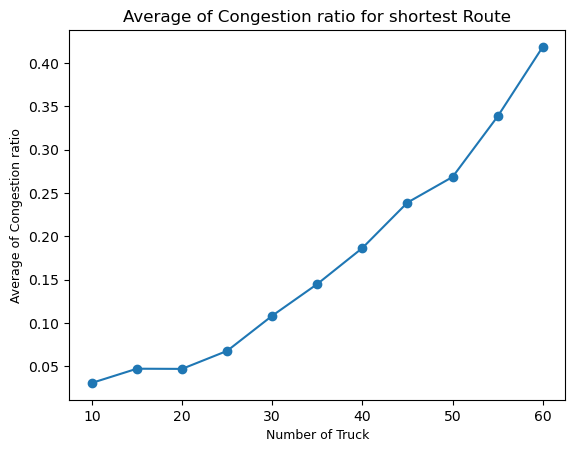

In [ ]:
y_value_list = []
for key, value in shortest_dfs.items():
        y_value_list.append(value['Congestion_ratio_AVG'].mean())

# draw line plot
plt.plot(x_value, y_value_list, marker='o', linestyle='-')                    

# Add labels and legend
plt.title('Average of Congestion ratio for shortest Route')
plt.xlabel(x_label, fontsize=9)
plt.ylabel('Average of Congestion ratio', fontsize=9)

plt.show()

In [ ]:
folder_path = 'Results'

title = 'Congestion ratio of shortest Route'

x_col = ['Prev Truck Number', 'Now Truck Number']
x_label = 'Number of Truck'
_y_col = ['Congestion_ratio']
y_lim = (0, 1.4)
legend_loc = 'upper left'

dfs = f.get_dfs_by_folder(folder_path, _y_col, True, standard_outlier=_y_col[0])
dfs = f.to_numeric(dfs, _y_col[0])
x_value = []
shortest_dfs = {}
# get new df where alpha_1 = 0
for key, value in dfs:

    # get value of where alpha_1 = 0
    shortest_df = value[value['alpha_1'] == 0]
    x_value.append(shortest_df[x_col].iloc[0].astype(int).sum())
    shortest_dfs[key] = shortest_df
    
    print('min : ', shortest_df[_y_col[0]].min(), 'max : ', shortest_df[_y_col[0]].max())
    
# f.scatterplot(shortest_dfs, x_value, x_label, _y_col[0], y_lim, title, 'steelblue', False, legend_loc)

Remove outliers by  Congestion_ratio !
min :  -0.08917192 max :  0.1756003
min :  -0.09343517 max :  0.2226633
min :  -0.09697974 max :  0.2251718
min :  -0.09546259 max :  0.2964902
min :  -0.1049242 max :  0.3756797
min :  -0.08636567 max :  0.4868526
min :  -0.08924523 max :  0.5957747
min :  -0.08222047 max :  0.6889742
min :  -0.081784 max :  0.8397203
min :  -0.07635883 max :  1.025648
min :  -0.0948113 max :  1.266309


### 전처리

In [33]:
folder_path = 'Results'

title = 'Congestion ratio of shortest Route'

x_col = ['Prev Truck Number', 'Now Truck Number']
x_label = 'Number of Truck'
_y_col = ['Congestion_ratio']
y_lim = (0, 1.4)
legend_loc = 'upper left'

dfs = f.get_dfs_by_folder(folder_path, _y_col, True, standard_outlier=_y_col[0])
dfs = f.to_numeric(dfs, _y_col[0])

new_dfs = {}

# remove that congestion ratio is under 0
for key, value in dfs:
    new_dfs[key] = value[value['Congestion_ratio'] >= 0]

Remove outliers by  Congestion_ratio !


In [34]:
# choose alpha_1 == 0

_y_col = ['Congestion_ratio']

shortest_dfs = {}
x_values = []

for key, value in new_dfs.items():
    shortest_df = value[value['alpha_1'] == 0]
    shortest_dfs[key] = shortest_df
    x_values.append(shortest_df[x_col].iloc[0].astype(int).sum())
    
    print(key, ' --> ' , 'min : ', shortest_df[_y_col[0]].min(), 'max : ', shortest_df[_y_col[0]].max())

prev_5_now_5  -->  min :  6.184582e-05 max :  0.1756003
prev_5_now_10  -->  min :  6.981519e-05 max :  0.2226633
prev_10_now_10  -->  min :  0.0001273097 max :  0.2251718
prev_10_now_15  -->  min :  8.897053e-05 max :  0.2964902
prev_15_now_15  -->  min :  7.864553e-05 max :  0.3756797
prev_15_now_20  -->  min :  8.897053e-05 max :  0.4868526
prev_20_now_20  -->  min :  0.0002356388 max :  0.5957747
prev_20_now_25  -->  min :  0.0002642832 max :  0.6889742
prev_25_now_25  -->  min :  0.000527541 max :  0.8397203
prev_25_now_30  -->  min :  0.00018637 max :  1.025648
prev_30_now_30  -->  min :  0.0001000305 max :  1.266309


In [35]:
import seaborn as sns

In [36]:
def scatterplot(_dfs, _x_value, x_label, y_col, y_lim, _title, _color, _legend, legend_loc):

    x_index = 0
    keys = []

    for key, value in _dfs.items():
        x_value = _x_value[x_index]
        y_value = value[y_col]
        keys.append(key)
        plt.scatter([x_value] * len(y_value), y_value, label=key, alpha = 0.05, color = _color)
        
        x_index += 1
        
    # # set y limit
    plt.ylim(y_lim)    
    plt.title(_title)
    plt.xlabel(x_label, fontsize = 9)
    plt.ylabel(y_col, fontsize = 9)
    if _legend == True:
        plt.legend(keys, fontsize = 7, loc = legend_loc)

    plt.show()

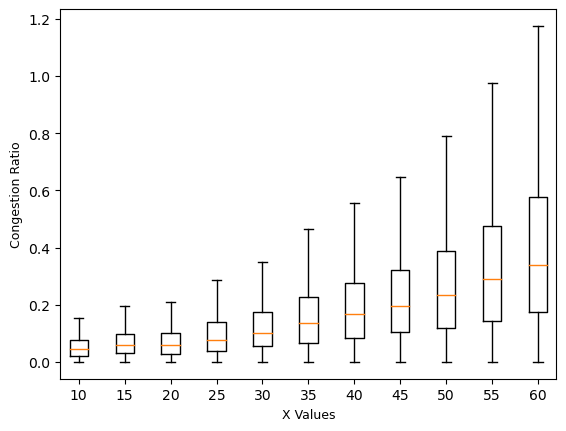

In [37]:
x_index = 0
keys = []

for key, value in shortest_dfs.items():
    x_value = x_values[x_index]
    y_value = value['Congestion_ratio']
    keys.append(key)

    # Box plot
    plt.boxplot(y_value, positions=[x_value], widths=2, showfliers=False)
                
    x_index += 1
# Set y limit
# plt.ylim(y_lim)
# plt.title(title)
plt.xlim(8, 62)
plt.xlabel('X Values', fontsize=9)
plt.ylabel('Congestion Ratio', fontsize=9)
      
plt.show()

In [38]:
for df_name, df in shortest_dfs.items():
    df['YT Num'] = int(df['Prev Truck Number'].unique()[0]) + int(df['Now Truck Number'].unique()[0])

C:\Users\USER\AppData\Local\Temp\ipykernel_25400\1822611699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YT Num'] = int(df['Prev Truck Number'].unique()[0]) + int(df['Now Truck Number'].unique()[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_25400\1822611699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YT Num'] = int(df['Prev Truck Number'].unique()[0]) + int(df['Now Truck Number'].unique()[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_25400\1822611699.py:2: SettingWithCopyWarning: 
A

In [39]:
# Concatenate DataFrames along the rows
merged_df = pd.concat(shortest_dfs.values(), ignore_index=True)
merged_df

,Prev Truck Number,Now Truck Number,alpha_1,alpha_2,alpha_3,repeat_num,Congestion_ratio,YT Num
0,5,5,0,0,100,1,0.064451,10
1,5,5,0,0,100,1,0.073779,10
2,5,5,0,0,100,1,0.102983,10
3,5,5,0,0,100,1,0.021926,10
4,5,5,0,0,100,1,0.123777,10
...,...,...,...,...,...,...,...,...
19806,30,30,0,0,100,60,0.573049,60
19807,30,30,0,0,100,60,0.284178,60
19808,30,30,0,0,100,60,0.322956,60
19809,30,30,0,0,100,60,0.345173,60


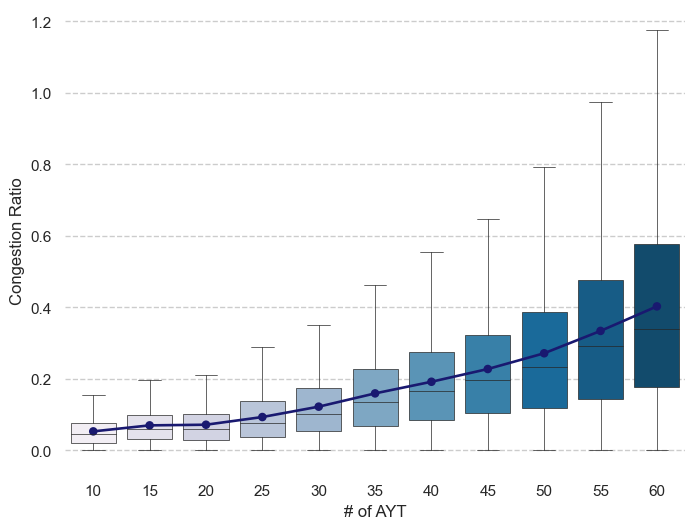

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_df is your dataframe
# Replace 'YT Num' with 'Congestion_ratio'
x_col = 'YT Num'
y_col = 'Congestion_ratio'

# Compute the average Congestion_ratio for each YT_Num
avg_congestion_ratio = merged_df.groupby(x_col)[y_col].mean().reset_index()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Remove graph spines
sns.despine(left=True, bottom=True)

# Change the y-axis grid to dashed lines
ax.yaxis.grid(True, linestyle='dashed')

sns.set_theme(style="whitegrid")

# Draw the boxplot without individual data points
# sns.boxplot(data=merged_df, x=x_col, y=y_col, palette="Blues", showfliers=False, linewidth=0.5)
sns.boxplot(data=merged_df, x=x_col, y=y_col, palette="PuBu", showfliers=False, linewidth=0.5)

# Overlay a pointplot with the average values
sns.pointplot(data=avg_congestion_ratio, x=x_col, y=y_col, color='midnightblue', markers='o', linestyles='-', scale=0.7)

# Add title and labels
# plt.title('Distribution of Congestion Ratio by YT Num with Average Line')
plt.xlabel('# of AYT', fontsize=12)
plt.ylabel('Congestion Ratio', fontsize = 12)

# Show the plot
plt.show()


In [25]:
y_value_list = []
for key, value in shortest_dfs.items():
        y_value_list.append(value['Congestion_ratio'].mean())

# draw line plot
plt.plot(x_values, y_value_list, marker='o', linestyle='-')                    

# Add labels and legend
plt.title('Congestion ratio AVG of shortest')
plt.xlabel(x_label, fontsize=9)
plt.ylabel('Average of Congestion ratio', fontsize=9)

plt.show()

NameError: name 'shortest_dfs' is not defined

In [26]:
y_value_list = []
for key, value in shortest_dfs.items():
        y_value_list.append(value['Congestion_ratio'].mean())

# draw line plot
plt.plot(x_value, y_value_list, marker='o', linestyle='-')                    

# Add labels and legend
plt.title('Congestion ratio AVG of shortest')
plt.xlabel(x_label, fontsize=9)
plt.ylabel('Average of Congestion ratio', fontsize=9)

plt.show()
        

NameError: name 'shortest_dfs' is not defined

In [ ]:
# title = 'Congestion ratio average of LP'

# x_col = ['Prev Truck Number', 'Now Truck Number']
# y_col = ['Congestion_ratio']
# y_lim = (0, 0.5)

# dfs = f.get_dfs_by_folder(folder_path, y_col, True, standard_outlier=y_col[0])
# dfs = f.to_numeric(dfs, y_col[0])
# print(dfs)

In [ ]:
# folder_path = 'results'
# x_col = 'alpha_1'
# y_col = ['Congestion_ratio', 'Completion_Time']
# col_num = 5
# y_lim = (300, 500)
# fig_size = (60, 20)
# title = 'Completion time by alpha_1'

# remove_df = f.get_dfs_by_folder(folder_path, y_col, True, standard_outlier = y_col[0])
# remove_df = f.to_numeric(remove_df, y_col[1])
# f.boxsubplot(remove_df, x_col, y_col[1], col_num, y_lim, title, fig_size)

In [ ]:
def lineplot_avg(_dfs, x_col_1, x_col_2, y_col, y_lim, _title):

    # Define a list of markers
    markers = ['o', 's', '^', 'D', 'v', 'p', 'h', 'x', '+', '*']
    label_list = []
    # Use cycle to create a cycling iterator for markers
    marker_cycle = cycle(markers)
    
    for key, value in _dfs:
        
        # get average of group by alpha_1, alpha_2, alpha_3
        df = value.groupby([x_col_1, x_col_2])[y_col].mean().reset_index()
        x_value = df[x_col_1]
        y_value = df[y_col]
        
        # Get the next marker from the cycle
        marker = next(marker_cycle)
        label_name = int(value['Prev Truck Number'][0]) + int(value['Now Truck Number'][0])
        label_list.append(label_name)
        
        # Plot the line with the specified marker
        plt.plot(x_value[1:], y_value[1:], marker=marker, label=label_name)

    
    plt.title(_title, fontsize=12)
    plt.xlabel(x_col_1, fontsize=9)
    plt.ylabel(y_col, fontsize=9)
    plt.legend(label_list, title = 'Number of YT', title_fontsize = 6, fontsize=6, loc='upper right')
    # set y limit
    plt.ylim(y_lim)

    # Create a secondary x-axis
    ax2 = plt.gca().secondary_xaxis('top')
    
    # Customize the secondary x-axis using the values from the specific column
    if x_col_2 in df.columns:
        ax2.set_xlabel(x_col_2, fontsize=9)
        ax2.set_xticklabels(df[x_col_2])
    
    for key, value in _dfs:
        df = value.groupby([x_col_1])[y_col].mean().reset_index()
        y_value = df[y_col]
        plt.axhline(y=y_value[0], linestyle='--', color ='gray' ,alpha=0.5)
    
    plt.show()


In [ ]:
def lineplot_range(_dfs, x_col_1, x_col_2, y_col, col_num, y_lim, _figsize, _title):

    folder_num = len(_dfs)

    if folder_num % col_num == 0:
        row_num = folder_num // col_num
    else:
        row_num = folder_num // col_num + 1
        

    fig, axes = plt.subplots(nrows=row_num, ncols=col_num, figsize=_figsize)

    for (key, value), ax in zip(_dfs, axes.ravel()):
        
        # Separate data based on x_col_1 being equal to 0 or not
        df_x0 = value[value[x_col_1] == 0].groupby([x_col_1, x_col_2])[y_col].agg(['mean', 'min', 'max']).reset_index()
        df_x_not0 = value[value[x_col_1] != 0].groupby([x_col_1, x_col_2])[y_col].agg(['mean', 'min', 'max']).reset_index()
        
        label_name = int(value["Prev Truck Number"].iloc[0]) + int(value["Now Truck Number"].iloc[0])
        
        # Plot the mean line with the specified line style and label for x_col_1!=0
        ax.plot(df_x_not0[x_col_1], df_x_not0['mean'], marker = 'o',label=label_name)
        # Plot the min and max values as a shaded region for x_col_1!=0
        ax.fill_between(df_x_not0[x_col_1], df_x_not0['min'], df_x_not0['max'], alpha=0.2, label=None)
        
        # Plot the min and max values as horizontal lines for x_col_1=0
        ax.axhline(y=df_x0['min'].iloc[0], linestyle='--', color='gray', alpha=0.7, label='min')
        ax.axhline(y=df_x0['mean'].iloc[0], linestyle='--', color='gray', alpha=0.7, label='mean')
        ax.axhline(y=df_x0['max'].iloc[0], linestyle='--', color='gray', alpha=0.7, label='max')

        # set y limit
        ax.set_ylim(y_lim)
        
        ax.set_title(key, fontsize= 9)
    
    fig.suptitle(_title, fontsize= 12)

    # set x label
    fig.text(0.5, 0.04, x_col_1, ha='center', fontsize=12)
    # set y label
    fig.text(0.1, 0.5, y_col, va='center', rotation='vertical', fontsize=12)
    
    plt.show()

### Travel Time by Distance

In [ ]:
folder_path = 'Results'
_y_col = ['Congestion_ratio', 'TravelTime_by_Distance']

travel_df = f.get_dfs_by_folder(folder_path, _y_col, True, standard_outlier = _y_col[0])
travel_df = f.to_numeric(travel_df, _y_col[1])

Remove outliers by  Congestion_ratio !


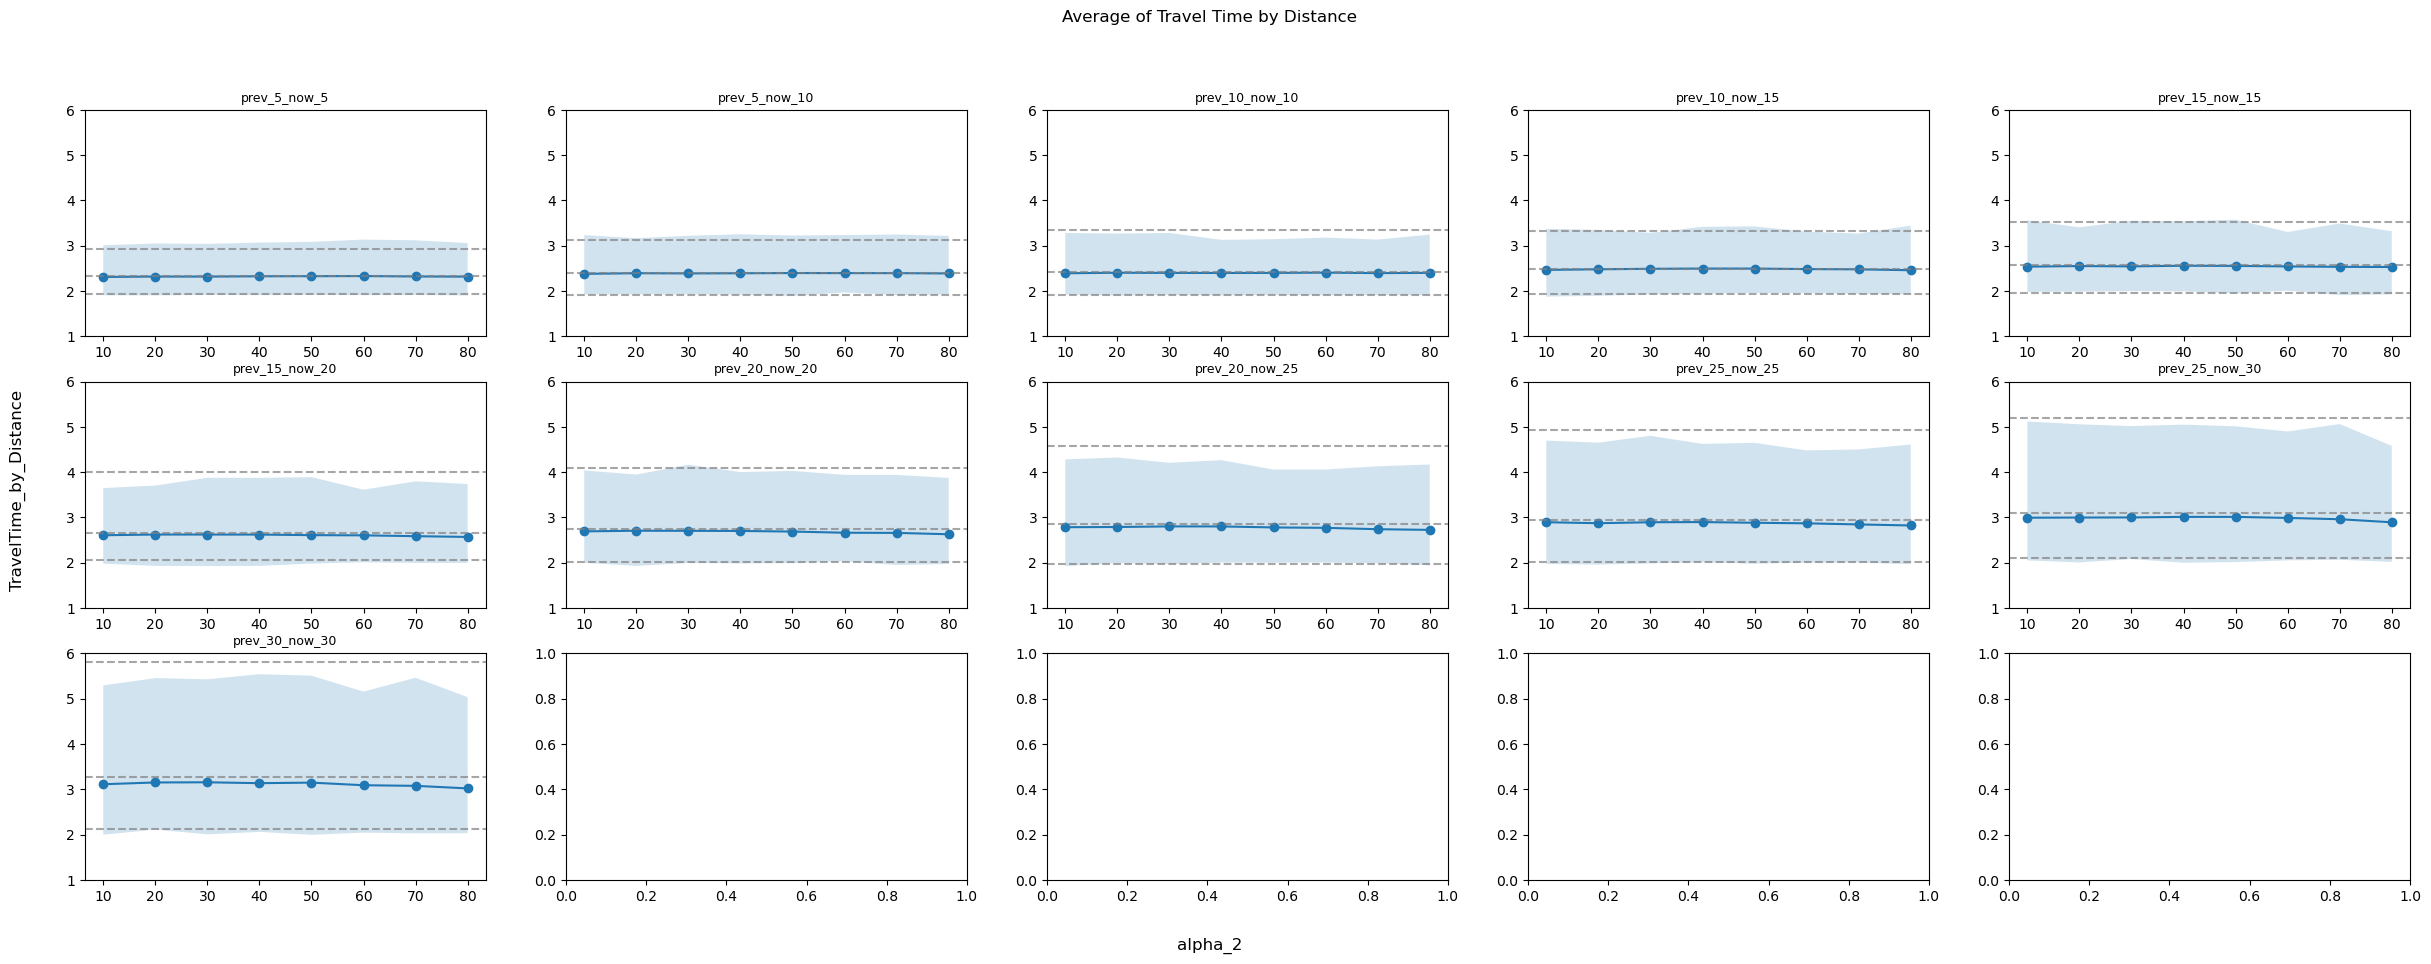

In [ ]:
x_col_1 = 'alpha_2'
x_col_2 = 'alpha_1'
col_num = 5

y_lim = (1, 6)
title = 'Average of Travel Time by Distance'
fig_size = (30, 10)

lineplot_range(travel_df, x_col_1, x_col_2, _y_col[1], col_num, y_lim, fig_size, title)

In [ ]:
folder_path = 'Results'
_y_col = ['C_max_prev', 'C_max_now', 'C_max']

c_max_df = f.get_dfs_by_folder(folder_path, _y_col, True, standard_outlier = _y_col[2])
c_max_df = f.to_numeric(c_max_df, _y_col[0])
c_max_df = f.to_numeric(c_max_df, _y_col[1])

for file_name, df in c_max_df:
    # add column
    df['Number of YT'] = int(df['Prev Truck Number'].unique()[0]) + int(df['Now Truck Number'].unique()[0])
    
print(c_max_df)

Remove outliers by  C_max !
[('prev_5_now_5',     Prev Truck Number Now Truck Number  alpha_1  alpha_2  alpha_3  repeat_num  \
0                   5                5        0        0      100           1   
1                   5                5        0        0      100           2   
2                   5                5        0        0      100           3   
3                   5                5        0        0      100           4   
4                   5                5        0        0      100           5   
..                ...              ...      ...      ...      ...         ...   
611                 5                5       80       10       10          56   
612                 5                5       80       10       10          57   
613                 5                5       80       10       10          58   
614                 5                5       80       10       10          59   
615                 5                5       80       10       

In [ ]:
concat_df = pd.DataFrame()

for file_name, df in c_max_df:
    shortest_df = df[(df['alpha_1'] == 0) & (df['alpha_2'] == 0) & (df['alpha_3'] == 100)]
    others_df = df[(df['alpha_1'] == 10) & (df['alpha_2'] == 80) & (df['alpha_3'] == 10)]
    
    # concat shortest_df and others_df and concat_df
    concat_df = pd.concat([concat_df, shortest_df, others_df], ignore_index=True)

print(concat_df)

     Prev Truck Number Now Truck Number  alpha_1  alpha_2  alpha_3  \
0                    5                5        0        0      100   
1                    5                5        0        0      100   
2                    5                5        0        0      100   
3                    5                5        0        0      100   
4                    5                5        0        0      100   
...                ...              ...      ...      ...      ...   
1624                30               30       10       80       10   
1625                30               30       10       80       10   
1626                30               30       10       80       10   
1627                30               30       10       80       10   
1628                30               30       10       80       10   

      repeat_num  C_max_prev  C_max_now    C_max  Number of YT  
0              1     404.816    396.952  404.816            10  
1              2     430.392 

In [ ]:
def lineplot_range_2(_df, _x_col, y_col, _y_lim, _figsize, _title, _legend_loc):

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize = _figsize)
    
    _shortest_df = _df[_df['alpha_1'] == 0]
    _others_df = _df[_df['alpha_1'] != 0]
    
    # Plot for _shortest_df
    axes[0].set_title('C_max of Shortest', fontsize= 12)
    axes[1].set_title('C_max of LP', fontsize= 12)
    
    for y_col_i in y_col:
        _shortest_df.groupby(_x_col)[y_col_i].mean().plot(ax=axes[0], label= 'Mean of ' + y_col_i)
        _others_df.groupby(_x_col)[y_col_i].mean().plot(ax=axes[1], label= 'Mean of ' + y_col_i)
        
        mean_shortest = _shortest_df.groupby(_x_col)[y_col_i].mean()
        min_shortest = _shortest_df.groupby(_x_col)[y_col_i].min()
        max_shortest = _shortest_df.groupby(_x_col)[y_col_i].max()

        mean_others = _others_df.groupby(_x_col)[y_col_i].mean()
        min_others = _others_df.groupby(_x_col)[y_col_i].min()
        max_others = _others_df.groupby(_x_col)[y_col_i].max()

        axes[0].fill_between(mean_shortest.index, min_shortest, max_shortest, alpha=0.2)
        axes[1].fill_between(mean_others.index, min_others, max_others, alpha=0.2)
    
    # Set common y-axis limits
    for ax in axes:
        ax.set_ylim(_y_lim)
        # ax.set_xlabel(_x_col)
        ax.set_ylabel('Completion Time')
        ax.legend(loc = _legend_loc, fontsize = 9)    
    
    plt.suptitle(_title)
    plt.show()
    

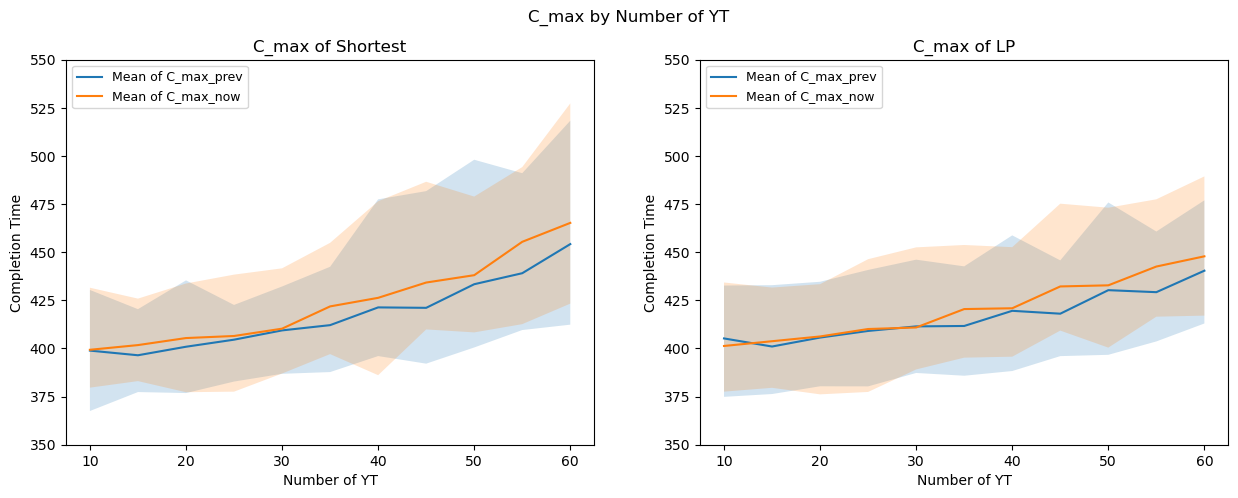

In [ ]:
x_col = 'Number of YT'
_y_col = ['C_max_prev', 'C_max_now']
y_lim = (350, 550)
fig_size = (15, 5)
title = 'C_max by Number of YT'
legend_loc = 'upper left'

lineplot_range_2(concat_df, x_col, _y_col, y_lim, fig_size, title, legend_loc)

In [ ]:
def lineplot_range_2(_df, _x_col, y_col, y_lim, _figsize, _title):

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=_figsize)

    for (key, value), ax in zip(_df, axes.ravel()):
        
        # Separate data based on x_col_1 being equal to 0 or not
        df_x0 = value[value[_x_col] == 0].groupby(_x_col)[y_col].agg(['mean', 'min', 'max']).reset_index()
        df_x_not0 = value[value[_x_col] != 0].groupby(_x_col)[y_col].agg(['mean', 'min', 'max']).reset_index()
        
        
        # Plot the mean line with the specified line style and label for x_col_1!=0
        ax.plot(df_x_not0[_x_col], df_x_not0['mean'], marker = 'o')
        # Plot the min and max values as a shaded region for x_col_1!=0
        ax.fill_between(df_x_not0[_x_col], df_x_not0['min'], df_x_not0['max'], alpha=0.2, label=None)
        
        # Plot the min and max values as horizontal lines for x_col_1=0
        ax.axhline(y=df_x0['min'].iloc[0], linestyle='--', color='gray', alpha=0.7, label='min')
        ax.axhline(y=df_x0['mean'].iloc[0], linestyle='--', color='gray', alpha=0.7, label='mean')
        ax.axhline(y=df_x0['max'].iloc[0], linestyle='--', color='gray', alpha=0.7, label='max')

        # set y limit
        ax.set_ylim(y_lim)
        
        ax.set_title(key, fontsize= 9)
    
    fig.suptitle(_title, fontsize= 12)

    # set x label
    fig.text(0.5, 0.04, _x_col, ha='center', fontsize=12)
    # set y label
    fig.text(0.1, 0.5, y_col, va='center', rotation='vertical', fontsize=12)
    
    plt.show()

In [ ]:
x_col = 'Number of YT'



C:\Users\USER\AppData\Local\Temp\ipykernel_23836\271525074.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df[x_col_2])


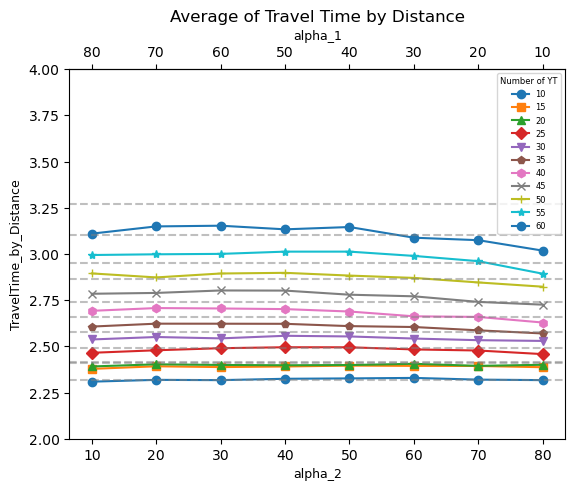

In [ ]:
x_col_1 = 'alpha_2'
x_col_2 = 'alpha_1'
y_lim = (2, 4)
title = 'Average of Travel Time by Distance'

lineplot_avg(travel_df, x_col_1, x_col_2, _y_col[1], y_lim, title)

C:\Users\USER\AppData\Local\Temp\ipykernel_23836\2905998956.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df[x_col_2])


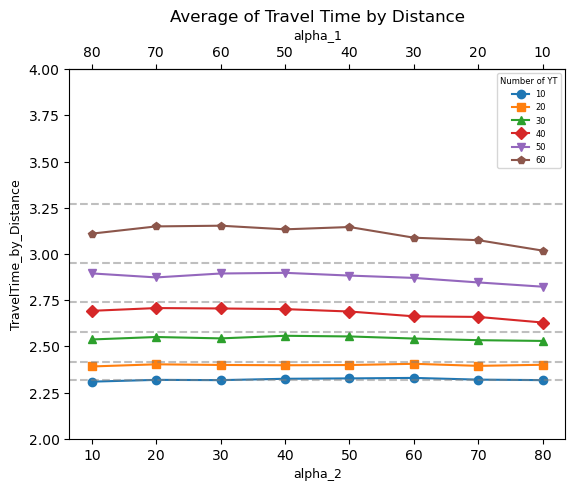

In [ ]:
# Given key_list
key_list = ['prev_5_now_5', 'prev_10_now_10', 'prev_15_now_15', 'prev_20_now_20', 'prev_25_now_25', 'prev_30_now_30']
# key_list = ['prev_5_now_5', 'prev_15_now_15', 'prev_25_now_25', 'prev_30_now_30']


# Initialize an empty list to store the selected DataFrames
selected_dfs = []

# Iterate through travel_df
for key, df in travel_df:
    if key in key_list:
        # Append the matching DataFrame to the selected_dfs list
        selected_dfs.append((key, df))

x_col_1 = 'alpha_2'
x_col_2 = 'alpha_1'
title = 'Average of Travel Time by Distance'
y_lim = (2, 4)

lineplot_avg(selected_dfs, x_col_1, x_col_2, _y_col[1], y_lim, title)